# Introduction to RL

This study started by asking the following question, can we actually do SFT with just thinking examples on the thinking models? Why do we need this new loss function?

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/dpo/3.webp?123" width=600px>

So I started by revisiting the basics: sigmoid, cross-entropy, KL divergence.

The first section contains all the theoritcal information and basic that I needed to understand how things work under the cover.

The second section contains implementation details to better understand how to implement it.

## References
I read, borrowed, and copied code from these references.

* [understanding-the-math-behind-grpo-deepseek-r1-zero](https://medium.com/yugen-ai-technology-blog/understanding-the-math-behind-grpo-deepseek-r1-zero-9fb15e103a0a)
* [DeepSeek GRPO related paper](https://arxiv.org/abs/2402.03300)
* [The Illustrated Deepseek-R1](https://newsletter.languagemodels.co/p/the-illustrated-deepseek-r1)
* [Huggingface LLM RL course](https://huggingface.co/learn/llm-course/chapter12/1?fw=pt)
* [unsloth: RL Slides](https://docs.google.com/presentation/d/1Jh5p_JDXt4eLD0ireaHJjJNpzqSF8E1WTwIHeojyjNU/edit?usp=sharing)
* [unsloth: RL Notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Qwen3_(4B)-GRPO.ipynb)
* [DPO from scatch](https://github.com/charbull/LLMs-from-scratch/blob/main/ch07/04_preference-tuning-with-dpo/dpo-from-scratch.ipynb)
* [State of LLM Reasoning](https://magazine.sebastianraschka.com/p/the-state-of-llm-reasoning-model-training)
* [Reinforcement finetuning with GRPO](https://learn.deeplearning.ai/courses/reinforcement-fine-tuning-llms-grpo)
* [Magistral paper](https://mistral.ai/static/research/magistral.pdf)
* [DPO paper](https://arxiv.org/pdf/2305.18290)
* [Gemma3 blog](https://huggingface.co/blog/gemma3)
* [TRL GRPO with HF](https://colab.sandbox.google.com/github/huggingface/cookbook/blob/main/notebooks/en/fine_tuning_llm_grpo_trl.ipynb)
* [To run on Mac Locally using MLX](https://www.linkedin.com/pulse/fine-tuning-gemma-3-1b-build-tool-calling-agent-mihir-jha--nqrof/)

## Logistic (Sigmoid) function

The **logistic function**, also very commonly known as the **sigmoid function** (though "sigmoid" can refer to a broader class of S-shaped functions), is a mathematical function that produces an S-shaped curve (a sigmoid curve).

Its primary characteristic and the reason it's so widely used in machine learning is that it takes **any real-valued number as input and squashes it into a value between 0 and 1.**

**Mathematical Formula:**

The most common form of the logistic function is:

$\sigma(x) = \frac{1}{1 + e^{-x}}$

Where:
*   $x$ is the input value (can be any real number).
*   $e$ is Euler's number (the base of the natural logarithm, approximately 2.71828).

Sometimes you might also see an equivalent form:
$\sigma(x) = \frac{e^x}{e^x + 1}$
(You can get this by multiplying the numerator and denominator of the first form by $e^x$).

**Key Properties and What it Means:**

1.  **S-Shaped Curve:** If you plot it, it looks like a stretched "S".
    *   For very large negative inputs ($x \rightarrow -\infty$), the output $\sigma(x)$ approaches 0.
    *   For very large positive inputs ($x \rightarrow +\infty$), the output $\sigma(x)$ approaches 1.
    *   When the input $x=0$, the output $\sigma(0) = \frac{1}{1 + e^0} = \frac{1}{1+1} = 0.5$. This is the midpoint of the S-curve.

2.  **Output Range (0, 1):**
    *   This is crucial. Because its output is always between 0 and 1 (exclusive of 0 and 1 unless $x$ is $\pm\infty$), it's perfectly suited for representing **probabilities**.
    *   An output of 0.7 can be interpreted as a 70% probability of something occurring.

3.  **Monotonically Increasing:** As the input $x$ increases, the output $\sigma(x)$ also increases (or stays the same, but never decreases).

4.  **Differentiable:** It has a smooth, well-behaved derivative, which is important for optimization algorithms like gradient descent used in training machine learning models. The derivative is $\sigma'(x) = \sigma(x)(1 - \sigma(x))$.


The core idea of logistic regression is to model the probability of a binary outcome (e.g., yes/no, 0/1, spam/not-spam). It does this by first calculating a linear combination of the input features, and this linear combination **is the logit**.

Here's the breakdown:

1.  **Input Features (Independent Variables):**
    You have a set of input features (or independent variables) for each data point. Let's say you have `n` features:
    $x_1, x_2, ..., x_n$

    *   Example: If you're predicting if a student passes an exam (binary outcome: Pass/Fail), your features might be:
        *   $x_1$: hours studied
        *   $x_2$: previous exam score
        *   $x_3$: attendance percentage

2.  **Weights (Coefficients) and Bias (Intercept):**
    The logistic regression model learns a set of **weights** (also called coefficients) for each feature, and a **bias** term (also called the intercept).
    *   Weights: $w_1, w_2, ..., w_n$
    *   Bias: $b$ (or $w_0$)

    These weights represent the importance or influence of each feature on the outcome. The bias term allows the model to have some baseline tendency even when all feature values are zero. These weights and the bias are learned during the model training process using your labeled data.

3.  **The Linear Combination (Calculating the Logit):**
    The logit, often denoted as $z$, is calculated as a weighted sum of the input features plus the bias term. This is a linear equation, just like in linear regression:

    $z = (w_1 \cdot x_1) + (w_2 \cdot x_2) + ... + (w_n \cdot x_n) + b$

    Or, if you include the bias as $w_0$ and assume an $x_0$ that is always 1:
    $z = w_0 \cdot x_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_n \cdot x_n$
    $z = \sum_{i=0}^{n} w_i \cdot x_i$
    (where $x_0 = 1$)

    **This value $z$ is the logit.**

    *   The logit can be any real number (positive, negative, or zero).
        *   A large positive logit suggests a high likelihood of the positive class.
        *   A large negative logit suggests a high likelihood of the negative class.
        *   A logit near zero suggests uncertainty.

4.  **Why is it called "Logit"? (The Log-Odds Connection)**
    The term "logit" comes from the fact that this value $z$ is considered to be the **logarithm of the odds** (log-odds) of the positive class occurring.

    *   Let $P$ be the probability of the positive class (e.g., $P(\text{Pass})=1$).
    *   The odds of the positive class are: $\text{Odds} = \frac{P}{1-P}$
    *   The logit is then: $z = \log\left(\frac{P}{1-P}\right)$

5.  **Converting the Logit to a Probability:**
    After calculating the logit $z$, the logistic regression model then applies the **logistic (sigmoid) function** to it to squash this value into a probability between 0 and 1:

    $P(\text{positive class}) = \sigma(z) = \frac{1}{1 + e^{-z}}$

    This $P$ is the model's predicted probability that the data point belongs to the positive class.

**Example:**

Let's say we're predicting if a loan application will be approved (Approved=1, Rejected=0).
Features:
*   $x_1$: Credit Score (e.g., 700)
*   $x_2$: Income (in thousands, e.g., 50)

Learned weights and bias from training:
*   $w_1 = 0.01$ (for Credit Score)
*   $w_2 = 0.05$ (for Income)
*   $b = -5.0$ (bias)

For a new applicant with Credit Score = 720 and Income = 60:

1.  **Calculate the Logit ($z$):**
    $z = (w_1 \cdot x_1) + (w_2 \cdot x_2) + b$
    $z = (0.01 \cdot 720) + (0.05 \cdot 60) + (-5.0)$
    $z = 7.2 + 3.0 - 5.0$
    $z = 5.2$

    So, the logit for this applicant is 5.2.

2.  **Convert Logit to Probability (using sigmoid):**
    $P(\text{Approved}) = \sigma(5.2) = \frac{1}{1 + e^{-5.2}}$
    $P(\text{Approved}) \approx \frac{1}{1 + 0.0055}$
    $P(\text{Approved}) \approx \frac{1}{1.0055} \approx 0.9945$

The model predicts a ~99.45% probability of loan approval for this applicant.

**In summary:** The logit in logistic regression is obtained by taking a linear combination (weighted sum + bias) of the input features. This logit value then serves as the input to the logistic (sigmoid) function, which transforms it into a probability. The weights used in this linear combination are what the model learns during training.

## Log probability

### Numerical Stability (Avoiding Underflow/Overflow):
* Probabilities are small: The probability of a specific long sequence of tokens (like a sentence or a piece of code) is the product of the probabilities of each token given the previous ones. For example, $ P(sequence) = P(token_1) * P(token_2|token_1) * P(token_3|token_1, token_2) * .... $

Each of these individual token probabilities is between 0 and 1. When you multiply many numbers between 0 and 1 together, the result becomes extremely small, very quickly.

* Underflow: Standard floating-point numbers in computers have limited precision. If a number becomes too small, it gets rounded down to zero (underflow). Once you hit zero, all subsequent multiplications will also be zero, and you lose all information.

* Logarithms convert products to sums: $log(A * B * C) = log(A) + log(B) + log(C)$.
Logarithms of numbers between 0 and 1 are negative. Summing negative numbers is much more numerically stable. The numbers might become large negative values, but they are less likely to hit the limits of floating-point representation as quickly as products hit zero.
Example: 0.1 * 0.01 * 0.2 = 0.0002.
log(0.1) + log(0.01) + log(0.2) ≈ -2.30 + (-4.60) + (-1.60) = -8.50.
For longer sequences, the product would get much smaller, while the sum of logs would just get more negative.

* Logarithms convert fractions to substractions: $\log\left(\frac{a}{b}\right) = \log a - \log b$

### Mathematical Convenience and Simplicity:

* Easier derivatives for optimization: Many loss functions involve probabilities (e.g., cross-entropy loss). When you take the derivative of a log-probability term, it often simplifies nicely. For instance, the derivative of log(f(x)) is f'(x)/f(x). This 1/f(x) term can cancel out parts of the original probability expression, especially when dealing with distributions like the softmax (which involves exponentials that are undone by the logarithm). Example (Softmax): The output of a softmax layer is $ p_i = exp(z_i) / Σ_j exp(z_j) $. The cross-entropy loss for a correct class c is -log(p_c). Taking the derivative of -log(p_c) with respect to z_i (the logits) becomes much simpler than differentiating -p_c.

* Maximizing log-likelihood: In statistics, we often want to find parameters that maximize the likelihood (or probability) of observing our data. Since the logarithm is a monotonically increasing function, maximizing log(P(data|parameters)) is equivalent to maximizing P(data|parameters), but log(P) is usually much easier to work with mathematically.

### Information Theoretic Interpretation:
* Cross-Entropy: The negative log-probability of the true class/token is directly related to the cross-entropy loss. Cross-entropy measures the "distance" or "inefficiency" when encoding events from one distribution using an optimal code for another distribution. Minimizing -log(P(correct_token)) is equivalent to minimizing the cross-entropy between the model's predicted distribution and the true one-hot distribution.

* KL Divergence: The DPO/GRPO loss formulation (and the underlying reward model it implicitly optimizes for) is closely related to the Kullback-Leibler (KL) divergence. KL divergence, which measures the difference between two probability distributions, is also defined using logarithms: $ KL(P || Q) = Σ P(x) log(P(x)/Q(x))$. The terms $ log(π_θ(y|x) / π_ref(y|x)) $ in the GRPO loss are essentially log probability ratios, which feature prominently in KL divergence.

### Gradient Scaling:

Using log probabilities can sometimes lead to better-behaved gradients during training. Gradients derived from products of many small probabilities can become vanishingly small, hindering learning. Logarithms help spread out these values.


## Cross Entropy

The Core Idea: Measuring the "Surprise" or "Difference"
Imagine you have:

* The True Distribution (P): This represents the actual, real-world probabilities of different events or classes. In supervised learning, this is your ground truth label.
* The Predicted Distribution (Q): This is what your model predicts for the probabilities of those same events or classes.

Cross-entropy measures how different the predicted distribution Q is from the true distribution P. More specifically, it quantifies the average number of bits needed to identify an event drawn from P if you use a coding scheme optimized for Q instead of P.
* If Q is very similar to P, the cross-entropy will be low.
* If Q is very different from P, the cross-entropy will be high.

Why is it a "Loss" Function?

In machine learning, we want our model's predictions (Q) to be as close as possible to the true labels (P). So, we use cross-entropy as a loss function:
High cross-entropy means our model is making poor predictions (its Q is far from P). This results in a large loss, signaling the model to adjust its parameters significantly.

Low cross-entropy means our model is making good predictions (its Q is close to P). This results in a small loss.
The goal of training is to minimize this cross-entropy loss.
The Formula
For discrete probability distributions P and Q over a set of C classes (or events):

$ H(P, Q) = - Σ_i P(i) * log(Q(i)) $

Where:

* $H(P, Q)$ is the cross-entropy between distributions P and Q.
* $Σ_i$ means "sum over all possible classes/events i from 1 to C".
* P(i) is the true probability of class i.
* Q(i) is the model's predicted probability for class i.
* log is usually the natural logarithm (ln), though base 2 is also used in pure information theory contexts (giving units of bits). In ML, the base doesn't fundamentally change the optimization.


The Most Common Case in Machine Learning: Single-Label Classification
In many classification tasks (e.g., image classification: "cat," "dog," "bird"), an input belongs to only one true class.
True Distribution (P): This is represented as a one-hot encoded vector.
If there are 3 classes and the true class is "dog" (say, class 2), then P = [0, 1, 0].

This means P(class_1_cat) = 0, P(class_2_dog) = 1, P(class_3_bird) = 0.
Predicted Distribution (Q): This comes from your model's output layer, typically after a softmax function, which ensures the probabilities sum to 1.
For example, Q = [0.1 (cat), 0.7 (dog), 0.2 (bird)].
How the Formula Simplifies for Single-Label Classification:
Let c be the index of the true class.
Then P(c) = 1, and P(i) = 0 for all i ≠ c.

The sum $Σ_i P(i) * log(Q(i))$ becomes:

$[P(1)*log(Q(1))] + [P(2)*log(Q(2))] + ... + [P(c)*log(Q(c))] + ...
= [0*log(Q(1))] + [0*log(Q(2))] + ... + [1*log(Q(c))] + ...
= log(Q(c)) $

So, for single-label classification, the cross-entropy loss simplifies to:
Cross-Entropy Loss = -log(Q(c))

Where Q(c) is the model's predicted probability for the correct class.
Intuition Behind -log(Q(c)):
Goal: We want Q(c) (the probability assigned to the correct class) to be as close to 1 as possible.
Behavior of -log(x) for $ 0 < x ≤ 1 $:
* If Q(c) is close to 1 (e.g., 0.99, model is confident and correct), -log(Q(c)) is close to 0 (low loss).
* If Q(c) is close to 0 (e.g., 0.01, model is confident but wrong, or very unsure), -log(Q(c)) is a large positive number (high loss).

This loss function heavily penalizes the model if it assigns a low probability to the correct answer. It drives the model to increase the probability it assigns to the true class.

Example:
Suppose 3 classes: Cat, Dog, Bird.
* True label: Dog. So P = [0 (Cat), 1 (Dog), 0 (Bird)].

Model 1 (Good prediction): Q1 = [0.1 (Cat), 0.8 (Dog), 0.1 (Bird)]
* $ Loss = -log(Q1(Dog)) = -log(0.8) ≈ 0.22 $ (low loss)

Model 2 (Bad prediction):  Q2 = [0.7 (Cat), 0.1 (Dog), 0.2 (Bird)]
* $ Loss = -log(Q2(Dog)) = -log(0.1) ≈ 2.30 $ (high loss)

Model 3 (Very confident but wrong): Q3 = [0.9 (Cat), 0.05 (Dog), 0.05 (Bird)]
* $Loss = -log(Q3(Dog)) = -log(0.05) ≈ 3.00 $ (even higher loss)

**Connection to Maximum Likelihood Estimation (MLE):**
Minimizing the cross-entropy loss (specifically -log(Q(c))) is equivalent to maximizing the log-likelihood of the observed true labels given the model's predictions. We want to find model parameters that make the observed data (the true labels) most probable.

In summary:

Cross-entropy is a measure of the difference between two probability distributions. In machine learning, it's used as a loss function to train classification models by penalizing them when their predicted probability for the true class is low, thereby pushing the model to make predictions that are closer to the true distribution. For the common single-label classification case, it beautifully simplifies to the negative log-probability of the correct class.

## KL Divergence and Cross entropy?

why do we use KL divergence instead of cross-entropy in GRPO?

### 1. Cross-Entropy's Usual Role: Fixed Targets

*   In typical classification or SFT for language models, **cross-entropy loss** (often simplified to $-\log P(\text{correct_token})$ or $-\log P(\text{correct_class})$) is used when you have a **ground truth target**.
*   For SFT, the "ground truth" is the next token in a human-written demonstration. You're trying to make your model $\pi_\theta$ predict that specific token with high probability.
    *   Example SFT Loss: $\text{Loss} = -\log \pi_\theta(y_{\text{target}} | x)$ (simplified for a whole sequence).
*   Here, $\pi_\theta$ is being directly compared to a fixed, known "correct" output. The goal is for the model's predicted distribution $Q$ to match the true distribution $P$ (which is often a one-hot vector representing the target).

### 2. The Goal of DPO/GRPO: Relative Preference & Regularization

*  DPO/GRPO don't operate with a single "correct" answer. They work with **preference pairs**: $y_c$ (chosen) is preferred over $y_r$ (rejected) for a given prompt $x$.
*   The objective isn't just to maximize the probability of $y_c$. It's to:
    1.   <font color='red'> Maximize the probability of $y_c$ *relative to* $y_r$.</font>
    2.  Do so in a way that doesn't drastically change the model from its initial, well-behaved state (the reference model $\pi_{\text{ref}}$, usually the SFT model).
*   <font color='red'> This "not drastically changing" part is crucial</font>. It's where the idea of **KL Divergence** becomes central. In the original Reinforcement Learning from Human Feedback (RLHF) formulation, the objective is to maximize reward *while constraining the KL divergence between the policy $\pi_\theta$ and the reference policy $\pi_{\text{ref}}$*:
    *   RLHF Objective (conceptual): $\text{Maximize } E[\text{Reward}(y)]$ subject to $D_{KL}(\pi_\theta || \pi_{\text{ref}}) \le \beta_{KL}$
    *   <font color='red'>This KL constraint prevents "reward hacking" (where the model finds trivial solutions to get high reward while destroying its general language abilities) by keeping it close to $\pi_{\text{ref}}$</font>.

### 3. DPO's Key Insight: Implicit Reward and the KL Connection

*   DPO provides a way to achieve the goals of KL-regularized RLHF *without* explicitly training a reward model or performing reinforcement learning.
*   It shows that the optimal policy $\pi^*$ for the KL-constrained reward maximization problem above can be written as: $ \pi^*(y|x) = \frac{1}{Z(x)} \pi_{\text{ref}}(y|x) \exp\left(\frac{1}{\beta_{DPO}} r(x,y)\right)$
where $r(x,y)$ is the (unknown) true reward function, $\beta_{DPO}$ is a scaling factor (like temperature), and $Z(x)$ is a partition function (normalizer).
*   Rearranging this, we can express the reward function in terms of the policies:
$r(x,y) \propto \log\left(\frac{\pi^*(y|x)}{\pi_{\text{ref}}(y|x)}\right) $
Ignoring $\beta_{DPO}$ and $Z(x)$ for proportionality as $Z(x)$ is constant for a given $x$ when comparing two responses).
*   Effectively, the "advantage" or implicit reward of a response $y$ by policy $\pi_\theta$ over $\pi_{\text{ref}}$ is proportional to:
$\log \pi_\theta(y|x) - \log \pi_{\text{ref}}(y|x)$ (which is $\log\left(\frac{\pi_\theta(y|x)}{\pi_{\text{ref}}(y|x)}\right)$)
*   This **log-probability ratio** is a core component that also appears in the definition of KL divergence:
$$ D_{KL}(\pi_\theta || \pi_{\text{ref}}) = \sum_y \pi_\theta(y|x) \log\left(\frac{\pi_\theta(y|x)}{\pi_{\text{ref}}(y|x)}\right) $$

### 4. How the DPO/GRPO Loss Uses This KL-Related Term

The DPO/GRPO loss is (for a single chosen $y_c$ and rejected $y_r$ for simplicity, GRPO averages this over multiple $y_r$):
$$ \text{Loss} = -\log\left(\sigma\left( \beta_{DPO} \left[ (\log \pi_\theta(y_c|x) - \log \pi_{\text{ref}}(y_c|x)) - (\log \pi_\theta(y_r|x) - \log \pi_{\text{ref}}(y_r|x)) \right] \right)\right) $$
(where $\sigma$ denotes the sigmoid function)

*   The terms $(\log \pi_\theta(y|x) - \log \pi_{\text{ref}}(y|x))$ are precisely these implicit reward estimates, derived from the logic connecting to KL-regularized RL.
*   <font color='red'>  The loss function aims to maximize the difference between the implicit reward of $y_c$ and $y_r$. </font>
*   By optimizing these log-probability ratios, DPO/GRPO implicitly finds a policy $\pi_\theta$ that is optimal under the Bradley-Terry model (which models preferences based on reward differences) *and* inherently respects the KL divergence constraint from the original RLHF problem.

### Why KL Divergence is "Under the Hood" and Not Just Cross-Entropy:

1.  **No Absolute Target:**  <font color='red'> We aren't saying $y_c$ is the 100% correct answer to be matched via cross-entropy. We're saying it's *better than* $y_r$. This is a relative judgment. </font>
2.  **Reference Model $\pi_{\text{ref}}$ is Crucial:**
    *   The $\pi_{\text{ref}}$ is not just an arbitrary starting point; it's the **anchor**. The DPO/GRPO loss structure encourages $\pi_\theta$ to learn the preferences while staying "close" (in a KL-divergence sense) to $\pi_{\text{ref}}$.
    *   If $\pi_{\text{ref}}$ already gives $y_c$ a high probability and $y_r$ a low one, $\pi_\theta$ doesn't need to change much for that pair.
    *   If $\pi_{\text{ref}}$ gives $y_r$ a high probability (i.e., the SFT model prefers the bad response), $\pi_\theta$ needs to work harder (increase its log-probability ratio for $y_c$ and decrease it for $y_r$) to satisfy the preference.
3.  **Implicit KL Regularization:**
    *   The DPO/GRPO loss formulation implicitly optimizes for a reward model that explains the human preferences while ensuring the resulting policy $\pi_\theta$ doesn't stray too far (in terms of KL divergence) from the reference SFT policy $\pi_{\text{ref}}$.
    *  <font color='red'>This regularization is key to stable and effective alignment. If you just used a cross-entropy-like loss to maximize $P(y_c)$ and minimize $P(y_r)$ without the $\pi_{\text{ref}}$ normalization, the model could easily overfit to the preference data and suffer from "catastrophic forgetting" of its general abilities </font>.

### In Essence:

*   **Cross-entropy** is suitable when you want your model's distribution $Q$ to directly match a fixed target distribution $P$ (e.g., one-hot labels in SFT or classification).
*   **KL divergence** (or objectives derived from it, as in DPO/GRPO) is suitable when you want to optimize a model $\pi_\theta$ relative to a reference $\pi_{\text{ref}}$ based on preferences or rewards, implicitly controlling how far $\pi_\theta$ moves from $\pi_{\text{ref}}$.

The GRPO/DPO loss structure cleverly bakes in this KL-regularized reward optimization directly from preference data, without needing to explicitly train a reward model or compute KL divergence during the loss calculation. The $\log(\pi_\theta(y|x)/\pi_{\text{ref}}(y|x))$ terms are the signature of this underlying KL-divergence-aware objective.


### Magistral RL changes

The [Magistral paper](https://arxiv.org/pdf/2506.10910) outlines few modifications for GRPO:

* KL divergence is eliminated: The KL divergence penalty constrains the online policy from deviating too much from a reference policy, helping to maintain alignment with the initial model. However, in GRPO, the policy diverges substantially regardless, and maintaining a copy of the reference model
for KL computation incurs a compute cost we find unjustified. We remove the KL penalty entirely.

* Loss normalization. To avoid introducing length biases between generations in one group, we normalize the loss by first adding token-wise loss for all tokens and all generations and then dividing by the total length of generations in the group $\sum_{i=1}^G |o_i|$. Why they do it? In our batch, some generated responses are long and some are short. If we just average the loss per sequence, the longer sequences will have a much larger impact on the final gradient because their loss is summed over more tokens. How they do it? They change the final loss calculation from a mean-per-sequence to a mean-per-token. This is done by taking a length-weighted average of the per-sequence losses. Each token across the entire batch contributes equally to the loss, regardless of which sequence it came from.



    1. The Problem: "Length Biases"

    When training an AI with Reinforcement Learning (RL), the model generates an answer (a "generation") and receives a "reward" or "loss" (a penalty).

    Imagine the model is asked a complex math problem. It makes two attempts (two "generations" in a "group"):

    *   **Generation 1 (Short & Wrong):** "The answer is 5."
        *   *Length:* 4 tokens.
        *   *Loss (Penalty):* Let's say it gets a high penalty of **-10**.

    *   **Generation 2 (Long & Wrong):** "Let me think... if I take the first number and multiply it by the second, and then add the third, I believe the final result, after careful consideration, is probably 5."
        *   *Length:* 30 tokens.
        *   *Loss (Penalty):* Because this answer is also wrong, it should also get a high penalty. But if the penalty is calculated for each token, the total penalty might be huge, say **-75**.

    **The Bias:** Without normalization, the training algorithm sees a penalty of -75 for the long answer and only -10 for the short one. It might incorrectly conclude: **"Generating long answers is extremely bad! I should always be brief, even if I'm wrong."**

    This is a "length bias." The model is being unfairly punished for its verbosity, not its incorrectness. This is especially bad for "reasoning models" which are *supposed* to generate long, step-by-step chains of thought.

    2. The Solution: "Loss Normalization"

    The paper's method fixes this by calculating the **average loss per token**.

    Here's how it works, using the same example:

      **"first adding token-wise loss for all tokens and all generations"**
        *   They take the total penalty from all attempts.
        *   **Total Loss** = (Loss from Gen 1) + (Loss from Gen 2) = (-10) + (-75) = **-85**.

      **"and then dividing by the total length of generations in the group"**
        *   They count the total number of tokens (words) across all attempts.
        *   **Total Length** = (Length of Gen 1) + (Length of Gen 2) = 4 + 30 = **34 tokens**.

      **Calculate the Normalized Loss:**
        *   **Normalized Loss** = Total Loss / Total Length = -85 / 34 = **-2.5 per token**.


* Advantage normalization. We estimate the advantage of each token simply as
$\hat{A}_{i, t} = \hat{A}_i = r_i - \mu$, where $\mu$ is the mean of rewards within a group.
Following [andrychowicz2020](https://arxiv.org/abs/2006.05990), we additionally normalize the advantages in each minibatch as $\hat{A}_{i, t}^{\text{norm}} = (\hat{A}_i - \hat{A}^{\text{mean}}) / \hat{A}^{\text{std}}$ where $\hat{A}^{\text{mean}}$ and $\hat{A}^{\text{std}}$ are the sequence-wise mean and standard deviation of the advantages $\hat{A}_i$ in a minibatch.


### Appendix Loss function
How did we get to this loss function?

$$ \text{Loss} = -\log\left(\sigma\left( \beta_{DPO} \left[ (\log \pi_\theta(y_c|x) - \log \pi_{\text{ref}}(y_c|x)) - (\log \pi_\theta(y_r|x) - \log \pi_{\text{ref}}(y_r|x)) \right] \right)\right) $$


The derivation combines a few key ideas:
1.  **Modeling Preferences with a Latent Reward Model:** We assume there's some underlying (latent) reward function $r(x,y)$ that humans use to judge responses.
2.  **Bradley-Terry Model:** This model is commonly used for pairwise comparisons. It states that the probability of item $A$ being preferred over item $B$ is a logistic function of the difference in their underlying "scores" or "strengths."
3.  **DPO's Connection to RLHF:** DPO showed that the optimal policy $\pi^*$ for a KL-regularized reward maximization objective (like in RLHF) can be expressed in terms of a reference policy $\pi_{\text{ref}}$ and this latent reward $r(x,y)$.
4.  **Maximum Likelihood Estimation:** We want to find model parameters that maximize the likelihood of observing the human preference data.

Here's the step-by-step derivation:

**Step 1: The Bradley-Terry Model for Preferences**

Let $r(x,y)$ be the (unknown) true reward score for a response $y$ given prompt $x$. The Bradley-Terry model posits that the probability of a human preferring $y_c$ (chosen) over $y_r$ (rejected) is given by a sigmoid function of the difference in their rewards: $\sigma(\text{score_difference})$

$$ P(y_c \succ y_r | x) = \sigma(\beta_{DPO} [r(x, y_c) - r(x, y_r)]) $$

Where:
*   $y_c \succ y_r$ means $y_c$ is preferred over $y_r$.
*   $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the logistic sigmoid function.
*   $\beta_{DPO}$ is a hyperparameter (like an inverse temperature) that scales the reward difference. A higher $\beta_{DPO}$ means the preferences are more deterministic based on the reward difference.

 **Converting Scores/Values to Probabilities:**
    *   In DPO/GRPO, the term inside the sigmoid function:
        $\beta_{DPO} \left[ (\log \pi_\theta(y_c|x) - \log \pi_{\text{ref}}(y_c|x)) - (\log \pi_\theta(y_r|x) - \log \pi_{\text{ref}}(y_r|x)) \right]$
        represents a "score difference" or "advantage" of the chosen response $y_c$ over the rejected response $y_r$, according to the current policy $\pi_\theta$ relative to the reference $\pi_{\text{ref}}$, scaled by $\beta_{DPO}$.
    *   This score difference can be any real number (large positive, large negative, or near zero).
    *   The logistic function (sigmoid) takes this score difference and converts it into a probability: the probability that $y_c$ is preferred over $y_r$.
        *   If the score difference is very large and positive (meaning $y_c$ is much "better" than $y_r$), the sigmoid output will be close to 1.
        *   If the score difference is very large and negative (meaning $y_c$ is much "worse" than $y_r$), the sigmoid output will be close to 0.
        *   If the score difference is close to 0 (meaning $y_c$ and $y_r$ are similarly "good"), the sigmoid output will be close to 0.5.


**Step 2: DPO's Insight – Expressing Reward in Terms of Policies**

The DPO paper shows (building on the optimal solution to KL-regularized RL) that the implicit reward can be related to the policy $\pi_\theta$ and the reference policy $\pi_{\text{ref}}$ as follows. The optimal policy $\pi^*$ is:

$$ \pi^*(y|x) = \frac{1}{Z(x)} \pi_{\text{ref}}(y|x) \exp(\frac{1}{\beta_{DPO}} r(x,y)) $$

Solving for $r(x,y)$:

$$ \frac{1}{\beta_{DPO}} r(x,y) = \log\left(\frac{\pi^*(y|x)}{\pi_{\text{ref}}(y|x)}\right) - \log Z(x) $$

So, $r(x,y) = \beta_{DPO} \left( \log\left(\frac{\pi^*(y|x)}{\pi_{\text{ref}}(y|x)}\right) - \log Z(x) \right)$.

When we consider the *difference* in rewards $r(x, y_c) - r(x, y_r)$, the $\log Z(x)$ term (which is a normalizer constant for a given $x$) cancels out:

$$ r(x, y_c) - r(x, y_r) = \beta_{DPO} \left[ \log\left(\frac{\pi^*(y_c|x)}{\pi_{\text{ref}}(y_c|x)}\right) - \log\left(\frac{\pi^*(y_r|x)}{\pi_{\text{ref}}(y_r|x)}\right) \right] $$

Let's define a shorthand for the log-policy ratio term, which acts as our model's estimate of the scaled reward (or "advantage" over reference):
Let $\hat{r}_\theta(x,y) = \log \pi_\theta(y|x) - \log \pi_{\text{ref}}(y|x)$.
This term represents how much more (or less) likely the current policy $\pi_\theta$ makes the response $y$ compared to the baseline $\pi_{\text{ref}}$, in log-space.

So, the difference in *our model's estimate* of the (unscaled) rewards is:
$$ \hat{r}_\theta(x, y_c) - \hat{r}_\theta(x, y_r) = \left( \log \pi_\theta(y_c|x) - \log \pi_{\text{ref}}(y_c|x) \right) - \left( \log \pi_\theta(y_r|x) - \log \pi_{\text{ref}}(y_r|x) \right) $$

**Step 3: Plugging the Model's Reward Estimate into the Bradley-Terry Model**

We now substitute our model's estimate of the reward difference into the Bradley-Terry preference probability:

$$ P(y_c \succ y_r | x; \theta) = \sigma\left( \beta_{DPO} \left[ (\log \pi_\theta(y_c|x) - \log \pi_{\text{ref}}(y_c|x)) - (\log \pi_\theta(y_r|x) - \log \pi_{\text{ref}}(y_r|x)) \right] \right) $$

This equation now gives the probability of observing the preference $(y_c, y_r)$ given our current policy $\pi_\theta$, the reference policy $\pi_{\text{ref}}$, and the hyperparameter $\beta_{DPO}$.

**Step 4: Maximum Likelihood Estimation and the Loss Function**

To train our policy $\pi_\theta$, we want to maximize the likelihood of the observed human preferences. For a dataset $D = \{(x^{(i)}, y_c^{(i)}, y_r^{(i)})\}$ of preference pairs, we want to maximize:

$$ L(\theta) = \prod_{i} P(y_c^{(i)} \succ y_r^{(i)} | x^{(i)}; \theta) $$

Maximizing the likelihood is equivalent to maximizing the log-likelihood (because $\log$ is a monotonic function):

$$ \log L(\theta) = \sum_{i} \log P(y_c^{(i)} \succ y_r^{(i)} | x^{(i)}; \theta) $$

In machine learning, we typically *minimize* a loss function. So, we minimize the negative log-likelihood (NLL):

$$ \text{Loss}(\theta) = -\log L(\theta) = -\sum_{i} \log P(y_c^{(i)} \succ y_r^{(i)} | x^{(i)}; \theta) $$

For a single preference pair $(x, y_c, y_r)$, the loss contribution is:

$$ \text{Loss}_{\text{single_pair}} = -\log P(y_c \succ y_r | x; \theta) $$

Substituting the expression for $P(y_c \succ y_r | x; \theta)$ from Step 3:

$$ \text{Loss}_{\text{single_pair}} = -\log\left(\sigma\left( \beta_{DPO} \left[ (\log \pi_\theta(y_c|x) - \log \pi_{\text{ref}}(y_c|x)) - (\log \pi_\theta(y_r|x) - \log \pi_{\text{ref}}(y_r|x)) \right] \right)\right) $$

This is precisely the DPO loss function.

**Summary of the Components:**

*   **$-\log(\cdot)$:** The negative log-likelihood part. Minimizing this maximizes the probability of the observed preferences.
*   **$\sigma(\cdot)$:** The sigmoid function, which maps the difference in "scores" to a probability between 0 and 1, as per the Bradley-Terry model.
*   **$\beta_{DPO}$:** A hyperparameter (temperature) that scales the difference. It controls how strongly the model should adhere to the preferences.
*   **$(\log \pi_\theta(y_c|x) - \log \pi_{\text{ref}}(y_c|x))$**: The "score" or "advantage" of the chosen response under the current policy $\pi_\theta$ relative to the reference policy $\pi_{\text{ref}}$. We want to make this term larger.
*   **$(\log \pi_\theta(y_r|x) - \log \pi_{\text{ref}}(y_r|x))$**: The "score" or "advantage" of the rejected response. We want to make this term smaller.
*   **The subtraction between these two "score" terms**: This is the core difference that the sigmoid acts upon. We want this difference to be positive and large, indicating that the chosen response is significantly "better" than the rejected one according to our policy (relative to the reference).

For GRPO, you would compute this loss for each $(y_c, y_{r_j})$ pair within a group (one chosen, multiple rejected) and then average these losses.

### Appendix: Latent
what does the term latent means in the `latent reward`?

In the term **"latent reward,"**

*   **"Reward"** refers to a numerical score that quantifies how good or desirable a particular model output (response $y$) is for a given input (prompt $x$). A higher reward means a better response.
*   **"Latent"** means **hidden, unobserved, or underlying**. It's not directly provided or measured.

So, a **"latent reward"** is a **hypothetical, underlying numerical score** that we assume humans use (consciously or unconsciously) when they express preferences, but which we don't get to see directly.

**Think of it this way:**

When a human evaluator says, "For prompt $x$, response $y_c$ is better than response $y_r$," they aren't typically thinking:
"Ah, $y_c$ has a reward score of 75.3 and $y_r$ has a reward score of 62.1, therefore $y_c$ is better."

Instead, they make a qualitative judgment. However, the DPO/RLHF framework *assumes* that this qualitative judgment is driven by some underlying (latent) reward values. The preference $y_c \succ y_r$ arises because, according to this latent system, $r(x, y_c) > r(x, y_r)$.

**Why is it "latent"?**

1.  **Not Explicitly Provided:** Humans provide *pairwise preferences* (this is better than that), not explicit numerical reward scores for each individual response. If they did provide scores, it wouldn't be "latent."
2.  **Inferred, Not Measured:** The goal of alignment algorithms like DPO (or training a separate reward model in traditional RLHF) is to *infer* or *learn a model of* this latent reward system based on the observed preference data. The algorithm tries to find a function that, if it *were* the true latent reward function, would best explain the preferences humans have shown.
3.  **A Theoretical Construct:** It's a useful mathematical and conceptual tool. By assuming the existence of this latent reward, we can use mathematical models (like the Bradley-Terry model) to connect observable preferences to the parameters of our language model.

**Analogy:**

Imagine you're trying to figure out someone's favorite ice cream flavors.
*   **Observable Data (Preferences):** You ask them, "Do you prefer chocolate or vanilla?" They say "Chocolate." "Do you prefer strawberry or chocolate?" They say "Chocolate." "Vanilla or Mint?" They say "Vanilla."
*   **Latent "Flavor Score":** You assume they have some internal, unstated "flavor score" for each ice cream. Chocolate has a higher latent score than vanilla for them. Vanilla has a higher latent score than mint.
*   **Your Goal:** You try to build a model of their preferences that implicitly assigns these latent scores based on their choices. You might conclude: LatentScore(Chocolate) > LatentScore(Vanilla) > LatentScore(Mint). You don't know the exact numbers, but you know their relative order and can build a system that predicts their future choices.

**In DPO/GRPO:**

*   The language model $\pi_\theta$ itself, through the term $\log \pi_\theta(y|x) - \log \pi_{\text{ref}}(y|x)$, becomes an *implicit representation* of this (scaled) latent reward.
*   The algorithm isn't trying to output an explicit reward number for every response. Instead, it's adjusting the probabilities $\pi_\theta(y|x)$ such that the *differences* in these implicit rewards (between chosen and rejected responses) align with the human preference data, as modeled by the Bradley-Terry setup.

So, "latent reward" is a key concept that bridges the gap between the qualitative, pairwise preference data we collect from humans and the quantitative optimization process used to align language models. It's the "hidden variable" we're trying to uncover or model.

## Putting everything together: GRPO in the DeepSeek paper

$$J_{GRPO}(\theta) = \mathbb{E}_{q \sim P(Q), \{o_i\}_{i=1}^G \sim \pi_{\theta_{old}}(O|q)} \left[ \frac{1}{G} \sum_{i=1}^{G} \frac{1}{|o_i|} \sum_{t=1}^{|o_i|} \left( \min \left( \frac{\pi_\theta(o_{i,t}|q, o_{i,<t})}{\pi_{\theta_{old}}(o_{i,t}|q, o_{i,<t})} \hat{A}_{i,t}, \text{clip} \left( \frac{\pi_\theta(o_{i,t}|q, o_{i,<t})}{\pi_{\theta_{old}}(o_{i,t}|q, o_{i,<t})}, 1-\epsilon, 1+\epsilon \right) \hat{A}_{i,t} \right) \right) - \beta D_{KL}(\pi_\theta || \pi_{ref}) \right]$$

Here's the dissection:

1.  **$J_{GRPO}(\theta)$**:
    *   The objective function to be maximized.
    *   $\theta$ are the parameters of the policy $\pi_\theta$ being optimized.

2.  **$\mathbb{E}_{q \sim P(Q), \{o_i\}_{i=1}^G \sim \pi_{\theta_{old}}(O|q)} [\dots]$**:
    *   $\mathbb{E}$: Expectation over samples.
    *   $q \sim P(Q)$: A query/prompt $q$ is sampled.
    *   The remaining part suggests that for a single query $q$, a **group or batch of $G$ different output sequences $o_i$ are sampled using the old policy $\pi_{\theta_{old}}$**. This is a key difference from the standard PPO notation which typically shows one $o$ per $q$ in the outer expectation. This "G" might hint at the "Grouped" aspect of "GRPO," but the original GRPO from DeepSeek is a DPO variant and doesn't directly use this PPO-style objective.

3.  **$\frac{1}{G} \sum_{i=1}^{G} \dots$**:
    *   This is an **average over the $G$ sampled output sequences** for the given query $q$.

4.  **$\frac{1}{|o_i|} \sum_{t=1}^{|o_i|} \dots$**:
    *   For each of the $G$ sequences $o_i$, this is an average over all timesteps (tokens) $t$ within that sequence.

5.  **$\min \left( \frac{\pi_\theta(o_{i,t}|q, o_{i,<t})}{\pi_{\theta_{old}}(o_{i,t}|q, o_{i,<t})} \hat{A}_{i,t}, \text{clip} \left( \frac{\pi_\theta(o_{i,t}|q, o_{i,<t})}{\pi_{\theta_{old}}(o_{i,t}|q, o_{i,<t})}, 1-\epsilon, 1+\epsilon \right) \hat{A}_{i,t} \right)$**:
    *   This is the **standard PPO-Clip term**, applied at the token level for each sequence $o_i$ in the group.
    *   $\frac{\pi_\theta(o_{i,t}|q, o_{i,<t})}{\pi_{\theta_{old}}(o_{i,t}|q, o_{i,<t})}$: The probability ratio $r_{i,t}(\theta)$ for token $o_{i,t}$ of sequence $o_i$.
    *   A is the advantage estimate for token $o_{i,t}$ of sequence $o_i$. This advantage would likely be derived from a reward model that scores the entire sequence $o_i$.
    *   $\epsilon$: The clipping hyperparameter.

6.  **$- \beta D_{KL}(\pi_\theta || \pi_{ref})$**:
    *   This is an **explicit KL divergence penalty term**.
    *   $D_{KL}(\pi_\theta || \pi_{ref})$: The Kullback-Leibler divergence between the current policy $\pi_\theta$ and some **reference policy $\pi_{ref}$**.
        *   **Crucially, this $\pi_{ref}$ is distinct from $\pi_{\theta_{old}}$**.
        *   $\pi_{\theta_{old}}$ is the policy used for data collection in the current iteration.
        *   $\pi_{ref}$ is typically a fixed, trusted policy, often the original SFT model. This term aims to prevent $\pi_\theta$ from straying too far from this trusted reference, maintaining its general capabilities and style.
    *   $\beta$: A hyperparameter that controls the strength of this KL penalty. A larger $\beta$ means a stronger penalty for deviating from $\pi_{ref}$.
    *   The negative sign means we are *subtracting* this penalty, so we are trying to *minimize* the KL divergence (since the overall objective $J$ is maximized).

**Interpretation and Potential Context:**

This objective function describes a PPO-like algorithm that:
1.  **Uses PPO's clipped surrogate objective** to encourage actions leading to higher advantage, while limiting the magnitude of policy updates.
2.  **Processes a group of $G$ responses per prompt** in its expectation calculation (this is unusual for the standard PPO formulation, which usually averages over state-action pairs without an explicit "group" like this for a single prompt, unless $G=1$). If $G > 1$, this could be a way to get a more stable estimate of the expected clipped advantage for a given prompt by sampling multiple continuations.
3.  **Includes an explicit KL divergence penalty** against a fixed reference policy $\pi_{ref}$. This is a common addition to PPO in RLAIF/RLHF to provide stronger regularization and prevent the policy from drifting too far from the base SFT model. The PPO clipping itself provides some regularization against $\pi_{\theta_{old}}$, but the explicit KL penalty against a more global $\pi_{ref}$ is often beneficial.

**How it differs from the actual GRPO (DeepSeek's DPO variant):**

*   **Core Mechanism:** The GRPO you asked about earlier is a **Direct Preference Optimization (DPO)** variant. DPO directly optimizes a policy based on preference pairs (chosen vs. rejected) and a loss function derived from the Bradley-Terry model and the relationship between optimal policies and reward functions. It *doesn't* use advantage estimates, explicit PPO-style clipping, or explicit KL divergence terms in its loss function (though the KL divergence is implicitly controlled).
*   **Data Source:** DPO/GRPO learn from fixed datasets of (prompt, chosen\_response, rejected\_response(s)). The formula you've given now implies data collection using $\pi_{\theta_{old}}$ and calculation of advantage estimates $\hat{A}_{i,t}$, which is characteristic of RL algorithms like PPO that typically use a reward model.
*   **"Grouped" aspect:**
    *   In DeepSeek's GRPO, "Grouped" refers to using one chosen response and *multiple* rejected responses for the *same prompt* in the preference data, and the loss is averaged over these chosen-rejected pairs.
    *   In the formula you just provided, the "Grouped" aspect ($G$ sequences) seems to be about sampling multiple outputs from $\pi_{\theta_{old}}$ for a given prompt during the PPO update phase.

**Conclusion for the new formula:**

The formula you've provided represents a sophisticated PPO-based objective that incorporates:
*   Standard PPO clipping for stable updates relative to the data-collection policy ($\pi_{\theta_{old}}$).
*   An additional, explicit KL divergence penalty to regularize the policy against a fixed reference model ($\pi_{ref}$).
*   A potential modification to sample and average over a group of $G$ responses generated by $\pi_{\theta_{old}}$ for each prompt, perhaps for variance reduction or a more robust gradient estimate.

This is a plausible objective for RLAIF/RLHF, but it's important to distinguish it from the DPO-based GRPO algorithm developed by DeepSeek. If this formula *is* being called "GRPO" by someone, it would be a different algorithm using the same acronym.

### Appendix on Clipping


1.  **`value_to_clip`**:
    $\frac{\pi_\theta(o_t|q, o_{<t})}{\pi_{\theta_{old}}(o_t|q, o_{<t})}$

    *   This is the **probability ratio**, often denoted as $r_t(\theta)$.
    *   $\pi_\theta(o_t|q, o_{<t})$: The probability of taking action $o_t$ (generating token $o_t$) in the current state (given query $q$ and previous tokens $o_{<t}$) according to the **current policy $\pi_\theta$** (the one being updated).
    *   $\pi_{\theta_{old}}(o_t|q, o_{<t})$: The probability of taking the *same* action $o_t$ in the *same* state according to the **old policy $\pi_{\theta_{old}}$** (the policy that was used to generate the experience/trajectory).
    *   **Interpretation of the ratio:**
        *   If $r_t(\theta) > 1$: The current policy makes this action more likely than the old policy did.
        *   If $r_t(\theta) < 1$: The current policy makes this action less likely than the old policy did.
        *   If $r_t(\theta) = 1$: The current policy assigns the same probability to this action as the old policy did.

2.  **`lower_bound`**:
    $1-\epsilon$

    *   $\epsilon$ (epsilon) is a small, positive hyperparameter (e.g., 0.1, 0.2).
    *   So, $1-\epsilon$ is a value slightly less than 1 (e.g., $1 - 0.2 = 0.8$).
    *   This sets the minimum allowed value for the probability ratio $r_t(\theta)$ in this clipped term.

3.  **`upper_bound`**:
    $1+\epsilon$

    *   This is a value slightly greater than 1 (e.g., $1 + 0.2 = 1.2$).
    *   This sets the maximum allowed value for the probability ratio $r_t(\theta)$ in this clipped term.

**How the `clip` function works here:**

The `clip` function takes the calculated probability ratio $r_t(\theta)$ and constrains it:

*   If $r_t(\theta) < (1-\epsilon)$: The output of `clip(...)` becomes $1-\epsilon$.
*   If $r_t(\theta) > (1+\epsilon)$: The output of `clip(...)` becomes $1+\epsilon$.
*   If $(1-\epsilon) \le r_t(\theta) \le (1+\epsilon)$: The output of `clip(...)` is just $r_t(\theta)$ itself (it's already within the bounds).

**What happens after the clipping:**

The result of this `clip` operation (the clipped probability ratio) is then multiplied by the advantage estimate $A_t$:

Clipped Term = $\text{clipped_ratio} \times A_t$

## How to run this

1) In a colab if you have enough compute

2) Connect to a local runtime

```sh
jupyter-server --ServerApp.allow_origin='https://colab.sandbox.google.com' --port=8888 --ServerApp.port_retries=0
```


In [ ]:
%pip install treescope

## Loss Implementation details

![Image](https://huggingface.co/datasets/trl-lib/documentation-images/resolve/main/grpo_visual.png)

Start with a base model, the reference policy model $\pi_{ref}$:

In [ ]:
import torch
# import treescope
# treescope.register_as_default()
# treescope.basic_interactive_setup(autovisualize_arrays=True)


def set_device():
  if torch.backends.mps.is_available():
    device_str = "mps"
  elif torch.cuda.is_available():
    device_str = "cuda"
  else:
    device_str = "cpu"

  device = torch.device(device_str)
  print("Using Device:", device)
  return device

device = set_device()

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Initialize model and tokenizer
model_str = 'babylm/babyllama-100m-2024'
base_model = AutoModelForCausalLM.from_pretrained(model_str)
tokenizer = AutoTokenizer.from_pretrained(model_str)

# pad on the left so we can append new tokens on the right
tokenizer.padding_side = "left"
tokenizer.truncation_side = "left"
# print(base_model)

In [ ]:
import torch

prompt = "The quick brown fox jumped over the "
# Define ANSI escape codes for colors for better readability
BLUE = '\033[94m'
RESET_COLOR = '\033[0m'

# Tokenize the prompt
input_ids = tokenizer(prompt, return_tensors="pt")
print(input_ids)

# Generate next 2 tokens
with torch.no_grad():
    outputs = base_model.generate(
        **input_ids,
        max_new_tokens=2,
        pad_token_id=tokenizer.pad_token_id
    )

# Decode the generated text
generated_text = tokenizer.decode(
    outputs[0], skip_special_tokens=True
)
generated_portion = generated_text[len(prompt):]
print(f"Generated text: {prompt}{BLUE}{generated_portion}{RESET_COLOR}")

### Create reference and policy models

The **reference model** is the base LLM, and remains unchanges throughout training.

The **policy** model is the same model with a LoRA adapter applied - the weights of the LoRA adapter get updated throughout the RFT training process.

In [ ]:
import copy
from peft import LoraConfig, get_peft_model

# Create a copy of the base model to use as the reference model
ref_model = copy.deepcopy(base_model)

# Initialize LoRA configuration
lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.1,
    init_lora_weights=False,
    bias="none",
    task_type="CAUSAL_LM"
)

# Apply LoRA to model
model = get_peft_model(base_model, lora_config)
# print(model)

### Calculating the policy loss ratio


In [ ]:
def prepare_inputs(prompt, completion):
    # Tokenization
    prompt_tokens = tokenizer(prompt, return_tensors="pt")
    completion_tokens = tokenizer(completion, return_tensors="pt")

    # Combined input
    input_ids = torch.cat(
        [
            prompt_tokens["input_ids"],
            completion_tokens["input_ids"]
        ],
        dim=1
    )
    attention_mask = torch.cat(
        [
            prompt_tokens["attention_mask"],
            completion_tokens["attention_mask"]
        ],
        dim=1
    )

    prompt_length = prompt_tokens["input_ids"].shape[1]
    completion_length = completion_tokens["input_ids"].shape[1]
    total_length = prompt_length + completion_length

    # Create a mask to identify the tokens that
    # were generated by the model in the full sequence.
    # we need this later to compute the loss only for the output tokens
    # generated by the model.
    completion_mask = torch.zeros(total_length, dtype=torch.float32)
    completion_mask[prompt_length:] = 1.0

    return input_ids, attention_mask, completion_mask

The following helper function allows:

1.  Asks the model: "For each position in this input sequence, what are your predicted scores (logits) for every word in your dictionary?"
2.  Converts these scores into log-probabilities for every word in the dictionary at each position.
3.  Then, for each position, it looks up the *actual word* that was in the input sequence and picks out the log-probability the model assigned to *that specific word* at *that specific position*.

**Why is this useful?**

*   **Calculating Loss:** This is a fundamental step in calculating the negative log-likelihood loss (or cross-entropy loss) for sequence models during training. The sum of these log-probabilities (often with a negative sign) forms the loss for the sequence.
*   **Evaluating Perplexity:** Perplexity, a common metric for evaluating language models, is derived from these log-probabilities.
*   **Policy Evaluation in RL:** In algorithms like PPO or DPO/GRPO, you need to calculate $\log \pi(a|s)$ (log-probability of an action given a state). For language models, an "action" is generating a token, and this function directly computes those log-probabilities for a given sequence (which could be generated by the policy or be part of a reference).
*   **Rescoring or Analysis:** You might want to know how likely a model finds a given piece of text.

This function is a very common utility when working with the outputs of language models.

In [ ]:
import torch.nn.functional as F

def compute_log_probs(model, input_ids, attention_mask):
    # outputs.logits: This attribute of the outputs object typically holds the
    # raw, unnormalized prediction scores (logits) for each token in the
    # vocabulary, at each position in the input sequence.
    # Shape of outputs.logits is (batch_size, sequence_length, vocab_size).
    # For each token position in the sequence, it gives a score for every
    # possible token in the model's vocabulary.
    outputs = model(input_ids, attention_mask=attention_mask)
    # size [1, 11, 16000] (batch, seq_len, vocab_size)
    # print('outputs.logits.shape', outputs.logits.shape)

    # Computing the log-probability of each token in the sequence
    # outputs.logits is the logits for all tokens in the vocabulary for each
    # position in the sequence
    # softmax: Converts the raw logits into probabilities (values between 0 and
    # 1 that sum to 1 across the vocabulary).
    # dim=-1: This specifies that the log_softmax operation should be applied
    # along the last dimension, which is the vocab_size dimension.
    # This means for each position in the sequence, it calculates the
    # log-probabilities across all possible vocabulary tokens.
    log_probs = F.log_softmax(outputs.logits, dim=-1)
    # size [1, 11, 16000] (batch, seq_len, vocab_size)
    # print('log_probs.shape', log_probs.shape)

    # Extract the log-probability for the actual token that
    # was generated at each position in the sequence.
    # (batch_size, sequence_length, vocab_size).
    # gather select the values from a tensor along the specified dimension
    # (dim=-1, vocab dim) using indices provided by another tensor (index)
    log_probs_inputs = log_probs.gather(
        dim=-1,
        index=input_ids.unsqueeze(-1)
    ).squeeze(-1)
    # size [1, 11] (batch, seq_len)
    # print('log_probs_inputs.shape', log_probs_inputs.shape)
    return log_probs_inputs


**1. The `dim` argument in `log_softmax`**

The `log_softmax` function (and `softmax`) needs to know **across which dimension to normalize the scores into probabilities (or log-probabilities).** Probabilities must sum to 1 over a set of mutually exclusive events.

*   `outputs.logits` has a shape like `(batch_size, sequence_length, vocab_size)`.
*   For a language model, at each `(batch_index, sequence_position)`, we have a distribution over the `vocab_size` possible tokens. This means the probabilities (and thus log-probabilities) should be normalized across the `vocab_size` dimension.

The **softmax function** is applied to this vector of logits $z$ to convert it into a probability distribution. For each logit $z_j$ in the vector $z$:

$$ \text{softmax}(z_j) = P_j = \frac{e^{z_j}}{\sum_{k=1}^{V} e^{z_k}} $$



**2. Why the `gather` step is necessary after `log_softmax`**

Even after correctly calculating `log_probs` with `dim=-1`, so that `log_probs` has the shape `(batch_size, sequence_length, vocab_size)`, we are still not done if the goal is to get the log-probability of the *actual input tokens*.

*   `log_probs[b, s, :]` gives you a vector of log-probabilities for **all** possible tokens in the vocabulary at position `(b, s)`.
*   However, we are usually interested in the log-probability that the model assigned to the **specific token that actually occurred** at that position in our `input_ids`.

**Example:**
Let `vocab_size = 50000`.
Let `input_ids[0, 5]` be token ID `123` (e.g., the word "hello").
Then `log_probs[0, 5, :]` is a vector of 50,000 log-probabilities.
We want to extract `log_probs[0, 5, 123]`, which is the log-probability the model assigned to "hello" at that specific position.

This is exactly what the `gather` operation does:
`log_probs.gather(dim=-1, index=input_ids.unsqueeze(-1))`

It uses the token IDs from `input_ids` as indices to pick out the corresponding log-probabilities from the full `log_probs` tensor.

In [ ]:
def grpo_loss(model, ref_model, prompt, completion, advantage):
    input_ids, attention_mask, completion_mask = prepare_inputs(
        prompt, completion
    )

    # Model forward
    token_log_probs = compute_log_probs(
        model, input_ids, attention_mask
    )
    # we dont want backward on the ref model since its frozen and used as a ref.
    with torch.no_grad():
      ref_token_log_probs = compute_log_probs(
            ref_model, input_ids, attention_mask
    )

    # ratio = pi_model / pi_ref = exp(log(pi_model) - log(pi_ref))
    ratio = torch.exp(token_log_probs - ref_token_log_probs)

    # Scale the ratio by the advantage function
    policy_loss = ratio * advantage

    # We want to maximize reward, so we make the loss negative
    # because optimizers minimize loss.
    per_token_loss = -policy_loss

    # Only compute loss over the output tokens
    loss = (per_token_loss * completion_mask).sum() / completion_mask.sum()
    return loss

In [ ]:
grpo_loss(model, ref_model, prompt, "fence and", advantage=2.0)

During the first step of training, the reference and policy models are identical. So the loss comes from the advantage of the reponse

In [ ]:
# At step 1, the model and reference model are the same
# So the loss is the advantage function because the ratio of
# per-token log-probabilities is 1
grpo_loss(ref_model, ref_model, prompt, "fence and", advantage=2.0)

In [ ]:
completion = "fence and"

input_ids, attention_mask, completion_mask = prepare_inputs(
    prompt, completion
)
with torch.no_grad():
    token_log_probs = compute_log_probs(
        model, input_ids, attention_mask
    )
    ref_token_log_probs = compute_log_probs(
        ref_model, input_ids, attention_mask
    )

ratio = torch.exp(token_log_probs - ref_token_log_probs)
print(ratio)

### Adding clipping to the policy loss

Clipping has no effect during the first step of training - the loss is still the advantage:


In [ ]:
def grpo_loss_with_clip(model, ref_model, prompt, completion, advantage, epsilon=0.2):
    input_ids, attention_mask, completion_mask = prepare_inputs(
        prompt, completion
    )

    # Model forward
    token_log_probs = compute_log_probs(
        model, input_ids, attention_mask
    )
    with torch.no_grad():
        ref_token_log_probs = compute_log_probs(
            ref_model, input_ids, attention_mask
    )

    # ratio = pi_model / pi_ref = exp(log(pi_model) - log(pi_ref))
    ratio = torch.exp(token_log_probs - ref_token_log_probs)

    # Scale the ratio by the advantage function
    unclipped = ratio * advantage
    clipped = torch.clamp(ratio, 1 - epsilon, 1 + epsilon) * advantage

    policy_loss = torch.min(unclipped, clipped)

    # We want to maximize reward, so we make the loss negative
    # because optimizers minimize loss.
    per_token_loss = -policy_loss

    # Only compute loss over the output tokens
    loss = (per_token_loss * completion_mask).sum() / completion_mask.sum()
    return loss

In [ ]:
grpo_loss_with_clip(
    model,
    ref_model,
    prompt,
    "fence and",
    advantage=2.0,
    epsilon=0.2
)

In [ ]:
# If we pass the reference model as also the model we're training, the ratio will be 1,
# so your loss will be the advantage.
grpo_loss_with_clip(
    ref_model,
    ref_model,
    prompt,
    "fence and",
    advantage=2.0
)

Check how many of the output tokens were clipped:

In [ ]:
import pandas as pd

completion = "fence and"

input_ids, attention_mask, _ = prepare_inputs(prompt, completion)
with torch.no_grad():
    token_log_probs = compute_log_probs(
        model, input_ids, attention_mask
    )
    ref_token_log_probs = compute_log_probs(
        ref_model, input_ids, attention_mask
    )

with torch.no_grad():
    epsilon = 0.2
    ratio = torch.exp(token_log_probs - ref_token_log_probs)
    ratio_unclipped = ratio
    ratio_clipped = torch.clamp(ratio, 1 - epsilon, 1 + epsilon)

print('ratio unclipped', ratio_unclipped[0][9:])
print('ratio clipped', ratio_clipped[0][9:])

### Adding KL Divergence to the loss


In [ ]:
def grpo_loss_with_kl(model, ref_model, prompt, completion, advantage, epsilon=0.2, beta=0.1):
    input_ids, attention_mask, completion_mask = prepare_inputs(
        prompt, completion
    )

    # Model forward
    token_log_probs = compute_log_probs(
        model, input_ids, attention_mask
    )
    with torch.no_grad():
        ref_token_log_probs = compute_log_probs(
            ref_model, input_ids, attention_mask
    )

    # ratio = p_model / p_ref = exp(log(p_model) - log(p_ref))
    ratio = torch.exp(token_log_probs - ref_token_log_probs)

    # Scale the ratio by the advantage function
    unclipped = ratio * advantage
    clipped = torch.clamp(ratio, 1 - epsilon, 1 + epsilon) * advantage

    policy_loss = torch.min(unclipped, clipped)

    # Compute the per-token KL divergence to encourage the model
    # to stay close to the reference model
    delta = token_log_probs - ref_token_log_probs
    per_token_kl = torch.exp(-delta) + delta - 1

    # We want to maximize reward, so we make the loss negative
    # because optimizers minimize loss.
    per_token_loss = -(policy_loss - beta * per_token_kl)

    # Only compute loss over the output tokens
    loss = (per_token_loss * completion_mask).sum() / completion_mask.sum()
    return loss

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Define the range of Δ (log-probability difference between
# model and reference)
delta = np.linspace(-6, 6, 500)

# Compute the per-token reverse KL divergence: KL(π_ref || π)
kl_divergence = np.exp(-delta) + delta - 1

# Plot the KL divergence
plt.figure(figsize=(8, 5))
plt.plot(delta, kl_divergence, label=r'$KL(\pi_{\mathrm{ref}} || \pi) = e^{-\Delta} + \Delta - 1$')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.fill_between(delta, kl_divergence, where=(delta > 0), color='red', alpha=0.3, label='Overconfident region (Δ > 0)')
plt.fill_between(delta, kl_divergence, where=(delta < 0), color='green', alpha=0.3, label='Conservative region (Δ < 0)')
plt.title("KL Divergence as 'Gravitational Pull' Toward Reference Policy")
plt.xlabel(r'$\Delta = \log \pi - \log \pi_{\mathrm{ref}}$')
plt.ylabel('KL Penalty')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
for beta in [0, 0.1, 0.5]:
    loss = grpo_loss_with_kl(
        model,
        ref_model,
        prompt,
        "fence and",
        advantage=2.0,
        epsilon=0.2,
        beta=beta
    )
    print(f"beta={beta}")
    print(f"loss={loss.item():.3f}")
    print()

# Wordle RL (work in progress)
In the following, we apply what we learned on a small model to have it play wordle. This is adapted from [DeepLearning course GRPO](https://www.google.com/url?q=https%3A%2F%2Flearn.deeplearning.ai%2Fcourses%2Freinforcement-fine-tuning-llms-grpo) but the training was abstracted by predibase so I thought we should write our own to learn.

## Start with base model

In [1]:
%pip install mlx-lm
%pip install matplotlib
%pip install torch

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch

# Check for MPS and set the device
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Using device: {device}")
else:
    device = torch.device("cpu")
    print(f"MPS not available, using CPU. Device: {device}")

Using device: mps


In [3]:
from huggingface_hub import notebook_login
notebook_login()

/Users/charbelk/dev/wordle-rl/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: The `notebook_login` function can only be used in a notebook (Jupyter or Colab) and you need the `ipywidgets` module: `pip install ipywidgets`.

### To Download from MLX

* pip install llm
* llm install llm-mlx
* llm mlx download-model mlx-community/gemma-3-1b-it-qat-8bit

In [4]:
from mlx_lm import load, generate, stream_generate
import torch
# use this only for inference

# model_id = "mlx-community/Qwen3-0.6B-4bit-DWQ-053125"
model_id = "mlx-community/gemma-3-1b-it-qat-8bit"

# model_id = "mlx-community/gemma-3-1b-it-qat-6bit"
# model_id = "mlx-community/DeepSeek-R1-Distill-Qwen-1.5B"
# model_id = "mlx-community/gemma-3-1b-it-qat-6bit"
# model_id = "mlx-community/gemma-3-1b-it-4bit"
# model_id = "mlx-community/gemma-3-1b-it-bf16"
torch_dtype = torch.bfloat16
# model_config = dict(attn_implementation='eager', torch_dtype=torch_dtype,device_map="auto", device=device)
gemma_model, gemma_tokenizer = load(path_or_hf_repo=model_id)

Fetching 8 files: 100%|██████████| 8/8 [00:00<00:00, 137518.16it/s]


In [ ]:
print(gemma_model)

In [21]:
from mlx_lm.sample_utils import make_sampler
make_sampler(temp=0.7)

def llm_generate_gemma(model, tokenizer, messages, max_tokens=512):
    """Generate text using LLM"""
    try:
        tokenizer.eos_token_id = tokenizer.get_vocab()["<end_of_turn>"]
    except KeyError:
        # Fallback for other models or tokenizer configs
         print("Warning: '<end_of_turn>' token not found. Using default eos_token.")
         pass

    prompt = tokenizer.apply_chat_template(
        messages, 
        add_generation_prompt=True,
        # Keep tokenize=True (the default) to get token IDs directly.
        # This is more efficient than creating a string and re-tokenizing.
        tokenize=True 
    )

    # Pass the eos_token_id to the generate function
    return generate(
        model, 
        tokenizer, 
        prompt=prompt, 
        # verbose=False, 
        max_tokens=max_tokens,
        sampler=make_sampler(temp=0.7),
    )

take it for a test

If you are running locally, you might want to use a smaller model

### Prepare your prompt

In [6]:
SYSTEM_PROMPT = """
You are a world-class Wordle-solving AI. Your goal is to guess the secret 5-letter word.

### Instructions
1.  **Analyze the feedback:** After each guess, you get clues.
    *   `✓` = Correct letter in the correct spot.
    *   `-` = Correct letter in the wrong spot.
    *   `x` = Letter is not in the word.

2.  **State your reasoning:** Inside `<think>` tags, briefly explain your logic.
    *   What clues do you have so far? (Correct letters, misplaced letters, wrong letters).
    *   What is your plan for the next guess?
    *   Why is your chosen word a good strategic move?

3.  **Make your guess:** After your reasoning, provide your 5-letter guess inside `<guess>` tags.

**IMPORTANT:** You MUST always follow the `<think>` and `<guess>` format exactly like the examples below.

---
### EXAMPLES

**Example 1: First Guess**

<think>
This is the first guess. There are no clues yet. A good starting word uses common and unique letters to get the most information. 'RAISE' is a great choice as it tests three common vowels (A, I, E) and two common consonants (R, S).
</think>
<guess>RAISE</guess>

**Example 2: A Mid-Game Guess**

**Clues so far:**
*   Guess 1: STORM → S(-), T(x), O(x), R(-), M(x)
*   Guess 2: BRAVE → B(✓), R(✓), A(x), V(x), E(x)

<think>
Based on the clues, I know the word starts with 'BR' (B✓, R✓). I also know the letter 'S' is in the word, but not in the first position. The letters T, O, M, A, V, E are wrong and must be avoided. My strategy is to find a word that fits the pattern `BR__S` or `BR_S_`. The word 'BRISK' fits all these rules perfectly. It starts with 'BR', contains 'S', and uses no incorrect letters.
</think>
<guess>BRISK</guess>

---
End of examples. The new puzzle starts now.
"""

In [24]:
gemma_messages = [
        {
            "role": "system",
            "content": SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": "This is your first guess. What is the 5-letter word?"
        }
    ]
text = ""
logits = []
generated_tokens = []
for response in llm_generate_gemma(gemma_model, gemma_tokenizer, gemma_messages):
    text += response
    # logits.append(response.logprobs)
    # generated_tokens.append(response.token)
print(text)
# print("Logits shape:", logits)
# print("Generated tokens:", generated_tokens)

<think>
Okay, let's start with a guess that incorporates the letters 'BR' and 'S'. I’ll focus on a word with a relatively common vowel and consonant combination. Given the feedback, I’m going to try to find a word that starts with 'BR' and has a 'S' in it.  I'll need to avoid common letters like 'E' and 'A'.

<guess>BRIS</guess>


In [25]:
from dataclasses import dataclass
from enum import Enum
from typing import List


class LetterFeedback(Enum):
    CORRECT = "✓"
    WRONG_POS = "-"
    WRONG_LETTER = "x"


@dataclass
class GuessWithFeedback:
    guess: str
    feedback: List[LetterFeedback]

    def __repr__(self) -> str:
        """Returns a readable string showing the guess alongside
        its letter-by-letter feedback."""
        feedback_str = " ".join(f"{letter}({fb.value})" for letter, fb in zip(self.guess, self.feedback))
        return f"{self.guess} → Feedback: {feedback_str}"

In [9]:
def render_user_prompt(past_guesses: List[GuessWithFeedback]) -> str:
    """Creates a user-facing prompt that includes past guesses
    and their feedback."""
    prompt = "Make a new 5-letter word guess."
    if past_guesses:
        prompt += "\n\nHere is some previous feedback:"
        for i, guess in enumerate(past_guesses):
            prompt += f"\nGuess {i+1}: {guess}"
    return prompt

In [10]:
def render_prompt(past_guesses: List[GuessWithFeedback]):
    """Formats a full chat prompt using a system message, user
    prompt, and assistant preamble to start the model's
    step-by-step reasoning."""
    messages = [
        {
            "role": "system",
            "content": SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": render_user_prompt(past_guesses)
        }
    ]
    return messages

In [26]:
secret_word = "CRAFT"

past_guesses = [
    GuessWithFeedback(
        "CRANE", [
            LetterFeedback.CORRECT,
            LetterFeedback.CORRECT,
            LetterFeedback.CORRECT,
            LetterFeedback.WRONG_LETTER,
            LetterFeedback.WRONG_LETTER,
        ]),
    GuessWithFeedback(
        "CRASH", [
            LetterFeedback.CORRECT,
            LetterFeedback.CORRECT,
            LetterFeedback.CORRECT,
            LetterFeedback.WRONG_LETTER,
            LetterFeedback.WRONG_LETTER,
        ]),
]

messages = render_prompt(past_guesses)
response = llm_generate_gemma(gemma_model, gemma_tokenizer, messages)
print("Gemma response : ", response)

Gemma response :  <think>
Okay, the feedback suggests a word that starts with 'C' and has a few letters missing. I'm going to try a word with a common vowel and a consonant, focusing on the 'C' starting point. Given the previous feedback, I'll try to avoid words with 'S' or 'H'. I'll focus on a word with 'R' and 'A'.
</think>
<guess>CARROT</guess>


In [27]:
import re

def get_feedback(guess: str, secret_word: str) -> List[LetterFeedback]:
    valid_letters = set(secret_word)
    feedback = []
    for letter, secret_letter in zip(guess, secret_word):
        if letter == secret_letter:
            feedback.append(LetterFeedback.CORRECT)
        elif letter in valid_letters:
            feedback.append(LetterFeedback.WRONG_POS)
        else:
            feedback.append(LetterFeedback.WRONG_LETTER)
    return feedback

In [28]:
import re
def next_turn_gemma(
        gemma_model,
        gemma_tokenizer,
    past_guesses: List[GuessWithFeedback],
    secret_word: str,
    number_guesses: int
):

    messages = render_prompt(past_guesses)
    print("Messages: ", messages)
    response = llm_generate_gemma(gemma_model, gemma_tokenizer, messages)
    match = re.search(
        r"<guess>\s*(.*?)\s*</guess>", response, re.DOTALL
    )
    if not match:
        print("invalid guess")
        return
    print("match: ", match)
    guess = match.group(1).upper()
    print('The LLM guessed: ', guess)
    feedback = get_feedback(guess, secret_word)
    past_guesses.append(GuessWithFeedback(guess, feedback))
    print("\n\n")
    print(("-" * 100) + "\n")
    for past_guess in past_guesses:
        print(past_guess)

    if guess == secret_word:
        print("🎉 SUCCESS 🎉")
    elif len(past_guesses) >= number_guesses:
        print("❌ better luck next time... ❌")

In [29]:
secret_word = "AUDIO"
past_guesses = []

In [30]:
n = 10
for i in range(n):
  next_turn_gemma(gemma_model, gemma_tokenizer, past_guesses, secret_word, number_guesses=n)

Messages:  [{'role': 'system', 'content': "\nYou are a world-class Wordle-solving AI. Your goal is to guess the secret 5-letter word.\n\n### Instructions\n1.  **Analyze the feedback:** After each guess, you get clues.\n    *   `✓` = Correct letter in the correct spot.\n    *   `-` = Correct letter in the wrong spot.\n    *   `x` = Letter is not in the word.\n\n2.  **State your reasoning:** Inside `<think>` tags, briefly explain your logic.\n    *   What clues do you have so far? (Correct letters, misplaced letters, wrong letters).\n    *   What is your plan for the next guess?\n    *   Why is your chosen word a good strategic move?\n\n3.  **Make your guess:** After your reasoning, provide your 5-letter guess inside `<guess>` tags.\n\n**IMPORTANT:** You MUST always follow the `<think>` and `<guess>` format exactly like the examples below.\n\n---\n### EXAMPLES\n\n**Example 1: First Guess**\n\n<think>\nThis is the first guess. There are no clues yet. A good starting word uses common and u

## Load the dataset

In [1]:
# Load dataset from HuggingFace
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset, the dataset has only train
train_dataset, test_dataset = load_dataset("predibase/wordle-grpo", split=['train[:95%]', 'train[:5%]'])
print(train_dataset)
print(test_dataset)

/Users/charbelk/dev/wordle/wordle-rl/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['prompt', 'word_list', 'past_guess_history', 'secret'],
    num_rows: 72
})
Dataset({
    features: ['prompt', 'word_list', 'past_guess_history', 'secret'],
    num_rows: 4
})


In [2]:
train_dataset[1]

{'prompt': '<|im_start|>system\n\nYou are playing Wordle, a word-guessing game.\n\n### Game Rules:\n- You have **6 tries** to guess a secret **5-letter** word.\n- Each guess must be a valid **5-letter English word**.\n- After each guess, you will receive feedback indicating how close your guess was.\n\n### Feedback Format:\nEach letter in your guess will receive one of three symbols:\n1. ✓ : The letter is in the word and in the CORRECT position.\n2. - : The letter is in the word but in the WRONG position.\n3. x : The letter is NOT in the word.\n\n### Example:\nSecret Word: BRISK\n\nGuess 1: STORM → Feedback: S(-) T(x) O(x) R(-) M(x)\nGuess 2: BRAVE → Feedback: B(✓) R(✓) A(x) V(x) E(x)\nGuess 3: BRISK → Feedback: B(✓) R(✓) I(✓) S(✓) K(✓)\n\n### Response Format:\nThink through the problem and feedback step by step. Make sure to first add your step by step thought process within <think> </think> tags. Then, return your guessed word in the following format: <guess> guessed-word </guess>.\n

In [ ]:
train_dataset = train_dataset.remove_columns(['word_list', 'prompt'])
test_dataset = test_dataset.remove_columns(['word_list', 'prompt'])

In [ ]:
import requests

def get_word_list_string_from_url(url: str) -> str:
    """
    Fetches a CSV file of words from a URL, parses it, and returns
    a string representation of a Python list of those words.

    Args:
        url (str): The URL of the raw CSV file.

    Returns:
        str: A string that can be used as a Python list literal.
             Returns an empty list '[]' on failure.
    """
    try:
        # 1. Fetch the data from the URL
        print(f"Fetching data from {url}...")
        response = requests.get(url)
        # Raise an exception for bad status codes (like 404, 500)
        response.raise_for_status()
        print("Data fetched successfully.")

        # 2. Parse the CSV content
        # The content is a single string with words separated by newlines
        csv_text = response.text
        lines = csv_text.splitlines()

        # 3. Create a clean list of words
        # We skip the first line (header: 'word') and filter out any empty lines
        word_list = [line.strip() for line in lines[1:] if line.strip()]
        
        print(f"Found {len(word_list)} five-letter words.")

        # 4. Convert the Python list to its string representation
        return str(word_list)

    except requests.exceptions.RequestException as e:
        print(f"Error: Could not fetch data from the URL. {e}")
        return "[]"
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return "[]"


# The URL you provided
WORD_LIST_URL = "https://raw.githubusercontent.com/arnavgarg1/arnavgarg1/refs/heads/main/five_letter_words.csv"

# Get the string
five_letter_words_string = get_word_list_string_from_url(WORD_LIST_URL)

# Print the final result (output is truncated for readability)
print("\nHere is the string representing the Python list:")
print(five_letter_words_string[:500] + "...") # Print the first 500 characters

## Prepare reward functions

in each reward function we will have the following args:

- completions: what the model returned
- prompts: the list of prompts
- completion_ids : list of list of tokens
- past_guess_history: list of guesses, example: ["[['CRANE', 'C(x) R(x) A(x) N(x) E(-)']], ...]
- secret: list of secrets, example: ['BEFIT', 'BEFIT',  ...]


## Training

Input:
- initial_policy: Starting model to be trained
- reward_function: Function that evaluates outputs
- training_prompts: Set of training examples
- group_size: Number of outputs per prompt (typically 4-16)

Algorithm GRPO:

For each training iteration:

   a. Set reference_policy = initial_policy (snapshot current policy)

   b. For each prompt in batch:

      - Generate group_size different outputs using initial_policy

      - Compute rewards for each output using reward_function

      - Normalize rewards within group:

           normalized_advantage = (reward - mean(rewards)) / std(rewards)

      - Update policy by maximizing the clipped ratio:
          min(prob_ratio * normalized_advantage, clip(prob_ratio, 1-epsilon, 1+epsilon) * normalized_advantage) - kl_weight * KL(initial_policy || reference_policy)

          where prob_ratio is current_prob / reference_prob

Output: Optimized policy model


## GRPO A La Magistral but with an update

As outlined above in the section: Magistral RL changes, the KL divergence was dropped entirely.


1.  **Role #1: Calculating KL Divergence (Very Expensive)**
    To calculate the full KL Divergence between two policies (`D_KL(π_current || π_ref)`), you have to compare the **entire probability distribution over the whole vocabulary** for every single token. This is computationally very expensive and is the part the Magistral authors decided was "unjustified" and **removed**.

2.  **Role #2: Calculating the Policy Ratio (Relatively Cheap)**
    The PPO/GRPO loss function is built on the ratio `r = π_current / π_ref`. To calculate this ratio, you only need the probability of the **single token that was actually generated**. You don't need the other 30,000+ probabilities in the distribution. This is much, much cheaper to compute.

Let's look at the paper's PPO/GRPO formula again on Page 2. It needs `π_θ_old` (an old/reference policy) to compute the ratio. The entire clipping mechanism `clip(ratio, ...)` depends on it.

So, when the authors say on Page 3 that they are removing the reference model, they specifically mean they are removing it from the costly **KL Divergence calculation**. They *keep* a reference policy to perform the much cheaper **ratio calculation** which is essential for the clipping mechanism.

 The `ref_model` is a snapshot of the initial model, and it **never changes**.


*   **What it does:** The ratio `π_current / π_ref` would measure the change from the **immediately preceding step**. This makes the algorithm very "on-policy," as you're always comparing against the policy that existed just a moment ago.
*   **Trade-offs:** This is the most responsive to recent changes, but it can also be less stable. If the model takes a "bad" step, the reference point immediately shifts to that bad location, potentially making it harder to recover.

### Recommended Approach: Periodic Updates (The Best of Both Worlds)

The most common and robust strategy in practice is to update the reference model **periodically**, for example, every 10, 50, or 100 steps.

*   **What it does:** This mimics the classic PPO workflow of:
    1.  Collect a batch of data using the current policy `π_k`.
    2.  For the next `N` steps, update the model, always comparing it against the fixed `π_k`.
    3.  After `N` steps, update the reference policy: `π_k` becomes the newly improved model `π_{k+1}`.
*   **Why it's good:** This provides a stable reference point for a block of updates, but also allows the reference to "catch up" to the learning progress, preventing the ratio from becoming too large or small over time.


In [1]:
SYSTEM_PROMPT = """
You are a world-class Wordle-solving AI. Your goal is to guess the secret 5-letter word.

### Instructions
1.  **Analyze the feedback:** After each guess, you get clues.
    *   `✓` = Correct letter in the correct spot.
    *   `-` = Correct letter in the wrong spot.
    *   `x` = Letter is not in the word.

2.  **State your reasoning:** Inside `<think>` tags, briefly explain your logic.
    *   What clues do you have so far? (Correct letters, misplaced letters, wrong letters).
    *   What is your plan for the next guess?
    *   Why is your chosen word a good strategic move?

3.  **Make your guess:** After your reasoning, provide your 5-letter guess inside `<guess>` tags.

**IMPORTANT:** You MUST always follow the `<think>` and `<guess>` format exactly like the examples below.

---
### EXAMPLES

**Example 1: First Guess**

<think>
This is the first guess. There are no clues yet. A good starting word uses common and unique letters to get the most information. 'RAISE' is a great choice as it tests three common vowels (A, I, E) and two common consonants (R, S).
</think>
<guess>RAISE</guess>

**Example 2: A Mid-Game Guess**

**Clues so far:**
*   Guess 1: STORM → S(-), T(x), O(x), R(-), M(x)
*   Guess 2: BRAVE → B(✓), R(✓), A(x), V(x), E(x)

<think>
Based on the clues, I know the word starts with 'BR' (B✓, R✓). I also know the letter 'S' is in the word, but not in the first position. The letters T, O, M, A, V, E are wrong and must be avoided. My strategy is to find a word that fits the pattern `BR__S` or `BR_S_`. The word 'BRISK' fits all these rules perfectly. It starts with 'BR', contains 'S', and uses no incorrect letters.
</think>
<guess>BRISK</guess>

---
End of examples. The new puzzle starts now.
"""
# ==============================================================================
# train_final.py
#
# A complete, self-contained script for training a language model on a Wordle
# task using a Group Relative Policy Optimization (GRPO) style loss.
#
# This script was iteratively developed and incorporates several advanced
# reinforcement learning concepts inspired by state-of-the-art methods like
# those discussed in the Mistral AI "Magistral" paper, including:
#   - A PPO-style clipped surrogate objective for stable updates.
#   - Critic-free advantage calculation and normalization.
#   - Per-token loss normalization to prevent length bias.
#   - A periodically updated reference policy for the PPO ratio.
#   - Detailed prompt engineering to guide model behavior.
#   - Evaluation and plotting of loss curves.
#
# ==============================================================================
import itertools
import copy
import re
import ast
import math
import mlx.core as mx
import mlx.nn as nn
import mlx.optimizers as optim
from mlx.utils import tree_flatten
from mlx_lm import load, generate
from mlx_lm.sample_utils import make_sampler
from datasets import load_dataset
from tqdm import tqdm
import matplotlib.pyplot as plt

# ==============================================================================
# --- 1. CONFIGURATION ---
# ==============================================================================
# Model and training parameters
# MODEL_NAME = "mlx-community/gemma-3-1b-it-qat-4bit"
MODEL_NAME = "mlx-community/gemma-3-1b-it-qat-8bit"
# MODEL_NAME = "mlx-community/Qwen3-0.6B-4bit-DWQ-053125"
ADAPTER_FILE = "wordle_gemma3_grpo_adapters.npz"
TRAIN_ITERATIONS = 200
LEARNING_RATE = 2e-6
LOGGING_STEPS = 5
CHECKPOINT_STEPS = 50
EVAL_STEPS = 50       # How often to run evaluation
EVAL_SAMPLES = 4     # Number of samples to use for evaluation

# LoRA parameters
LORA_RANK = 8
LORA_ALPHA = 16
LORA_DROPOUT = 0.1
LORA_LAYERS_TO_TUNE = 16

# RL / Generation parameters
NUM_GENERATIONS = 4   # Number of responses to generate per prompt for the RL batch
MAX_COMPLETION_LENGTH = 256

# GRPO / PPO specific parameters
PPO_CLIP_EPSILON = 0.2  # The clipping threshold for the PPO objective
REF_UPDATE_STEPS = 30   # How often to update the reference model to the current model's state
SAMPLING_TEMPERATURE=0.7
# A detailed system prompt using prompt engineering techniques (e.g., role-playing,
# structured instructions, few-shot examples) to guide the model's behavior. This
# aligns the model's task with our reward function and encourages structured
# chain-of-thought reasoning.

# ==============================================================================
# --- 2. LoRA Code (Copied directly from mlx-examples) ---
# ==============================================================================
# We define the LoRALinear class here to avoid importing it from mlx-examples,
# making the script fully self-contained.
class LoRALinear(nn.Module):
    @staticmethod
    def from_linear(linear: nn.Linear, rank: int = 8):
        output_dims, input_dims = linear.weight.shape
        if isinstance(linear, nn.QuantizedLinear):
            input_dims *= 32 // linear.bits
        lora_lin = LoRALinear(input_dims, output_dims, rank)
        lora_lin.linear = linear
        return lora_lin
    def to_linear(self):
        linear = self.linear
        bias = "bias" in linear
        weight = linear.weight
        is_quantized = isinstance(linear, nn.QuantizedLinear)
        dtype = weight.dtype
        if is_quantized:
            dtype = mx.float16
            weight = mx.dequantize(
                weight,
                linear.scales,
                linear.biases,
                linear.group_size,
                linear.bits,
            )
        output_dims, input_dims = weight.shape
        fused_linear = nn.Linear(input_dims, output_dims, bias=bias)
        lora_b = (self.scale * self.lora_b.T).astype(dtype)
        lora_a = self.lora_a.T.astype(dtype)
        fused_linear.weight = weight + lora_b @ lora_a
        if bias:
            fused_linear.bias = linear.bias
        if is_quantized:
            fused_linear = nn.QuantizedLinear.from_linear(
                fused_linear,
                linear.group_size,
                linear.bits,
            )
        return fused_linear
    def __init__(
        self,
        input_dims: int,
        output_dims: int,
        lora_rank: int = 8,
        bias: bool = False,
        scale: float = 20.0,
    ):
        super().__init__()
        self.linear = nn.Linear(input_dims, output_dims, bias=bias)
        self.scale = scale
        scale = 1 / math.sqrt(input_dims)
        self.lora_a = mx.random.uniform(
            low=-scale,
            high=scale,
            shape=(input_dims, lora_rank),
        )
        self.lora_b = mx.zeros(shape=(lora_rank, output_dims))
    def __call__(self, x):
        dtype = self.linear.weight.dtype
        if isinstance(self.linear, nn.QuantizedLinear):
            dtype = self.linear.scales.dtype
        y = self.linear(x.astype(dtype))
        z = (x @ self.lora_a) @ self.lora_b
        return y + self.scale * z

# ==============================================================================
# --- 3. HELPER & REWARD FUNCTIONS ---
# ==============================================================================
# These functions help parse the data and calculate a reward score for each
# generated response. The total reward guides the reinforcement learning process.
import ast

def format_prompt_from_dataset(sample):
    """
    Formats the user prompt to match the markdown style in the system prompt's examples.

    For the first turn, it provides a simple instruction. For subsequent turns,
    it formats the history as a markdown list under a "Clues so far" heading.
    """
    history_str = sample['past_guess_history']
    
    try:
        # Safely evaluate the string representation of the list
        history_list = ast.literal_eval(history_str)
    except (ValueError, SyntaxError):
        history_list = []

    # --- Case 1: First guess of the game ---
    if not history_list:
        return "This is the first turn. Please provide your best starting word."

    # --- Case 2: Mid-game with a history of previous guesses ---
    prompt_parts = ["**Clues so far:**"]
    for i, (guess, feedback) in enumerate(history_list):
        # Format each line to match the markdown list in the system prompt, e.g.:
        # "*   Guess 1: RAISE → R(x) A(✓) I(x) S(-) E(x)"
        prompt_parts.append(f"*   Guess {i+1}: {guess} → {feedback}")
    
    # Join all parts into a single string separated by newlines
    return "\n".join(prompt_parts)

def parse_guess(response: str) -> str:
    """
    Parses the guessed word from the model's response.
    This function robustly extracts all letters from within the <guess>
    tag and returns them as a clean string, regardless of length.
    """
    match = re.search(r"<guess>(.*?)</guess>", response, re.DOTALL | re.IGNORECASE)
    if not match:
        return None

    # Clean the extracted content: find all alphabetic characters and join them.
    letters = re.findall(r"[A-Z]", match.group(1), re.IGNORECASE)
    
    if not letters:
        return None

    return "".join(letters).upper()


def reward_for_format(completion: str) -> float:
    """
    Rewards the model for correctly using the <think> and <guess> tags.
    It provides a base reward for a valid guess format and a large bonus
    if the guess is the correct length (5 letters).
    """
    try:
        # A basic check for the presence of all required tags
        if not ("<think>" in completion and "</think>" in completion and 
                "<guess>" in completion and "</guess>" in completion):
            return 0.0

        guess = parse_guess(completion)
        
        # If no guess could be parsed at all, reward is 0.
        if not guess:
            return 0.0

        # --- Reward Shaping ---
        # 1. Give a small base reward for successfully producing a parsable guess.
        #    This encourages the model to learn the tag format.
        reward = 1.0
        
        # 2. Give a large additional reward only if the guess is the correct length.
        #    This specifically encourages the model to learn the 5-letter constraint.
        if len(guess) == 5:
            reward += 2.5 # Bonus for getting the length right
            
        return reward
    except Exception: 
        return 0.0

def reward_for_feedback_use(completion: str, history_str: str) -> float:
    try:
        guess = parse_guess(completion)
        if not guess: return 0.0
        history_list = ast.literal_eval(history_str) if history_str else []
        
        if not history_list: 
            # return 1 for the guess we dont want to penalize on the first guess
            # avoid reward hacking?
            return 1
        correct, valid, wrong = {}, {}, {}
        for _, feedback_str in history_list:
            for i, fb in enumerate(feedback_str.split(" ")):
                letter, status = fb[0], fb[2]
                if status == '✓': correct.setdefault(letter, set()).add(i)
                elif status == '-': valid.setdefault(letter, set()).add(i)
                else: wrong.setdefault(letter, set()).add(i)
        reward = 0.0
        for idx, letter in enumerate(guess):
            if (letter in correct and idx in correct[letter]): reward += 2
            elif (letter in valid and idx not in valid[letter]): reward += 1
            elif (letter in valid and idx in valid[letter]): reward -= 1.5
            elif letter in wrong: reward -= 0.5
            else: reward += 0.05
        return max(0, reward)
    except Exception: return 0.0

from collections import Counter

def reward_partial_credit(guess: str, secret_word: str) -> float:
    """
    Calculates a partial credit reward for a guess against a secret word,
    correctly handling duplicate letters.
    """
    # Ensure consistent case for comparison
    guess = guess.upper()
    secret_word = secret_word.upper()
    
    # Handle cases where guess and secret word might not be the same length
    # This can happen if the model generates a non-5-letter word
    min_len = min(len(guess), len(secret_word))
    
    reward = 0.1  # Base reward for making a guess
    
    # Use a Counter to track the available letters for scoring "yellows"
    secret_counts = Counter(secret_word)
    
    # Use a list to track which letters in the guess have been scored
    # to prevent scoring them twice (as both green and yellow)
    scored = [False] * len(guess)

    # --- Pass 1: Score "Green" letters (exact matches) ---
    for i in range(min_len):
        if guess[i] == secret_word[i]:
            reward += 1.5
            secret_counts[guess[i]] -= 1  # Decrement the count for this matched letter
            scored[i] = True

    # --- Pass 2: Score "Yellow" letters (misplaced matches) ---
    for i in range(len(guess)):
        # Only check letters that were NOT a perfect match (not green)
        if not scored[i]:
            # If the letter exists in the secret word AND we still have some left to match
            if guess[i] in secret_counts and secret_counts[guess[i]] > 0:
                reward += 0.5
                secret_counts[guess[i]] -= 0.5  # Decrement the count, "using up" this yellow match
    
    return reward

def calculate_total_reward(completion: str, sample: dict) -> float:
    secret_word = sample['secret']
    history_str = sample['past_guess_history']
    format_r = reward_for_format(completion)
    if format_r == 0.0: 
        return 0.0
    feedback_r = reward_for_feedback_use(completion, history_str)
    guess = parse_guess(completion)
    solution_r = 0.1
    if guess:
        if guess.upper() == secret_word.upper():
            solution_r = 10.0
        else:
            solution_r = reward_partial_credit(guess, secret_word)
    return format_r + feedback_r + solution_r

def get_log_probs(model, input_ids, output_ids):
    full_sequence = mx.concatenate([input_ids, output_ids], axis=1)
    logits = model(full_sequence)
    # take only the output logits
    # [: take all the batches
    # the index where we start taking the slice: input_ids.shape[1]-1
    # the cat sat on -> 4 - 1 : we slice at 3
    # :-1 (the end of the slice)
    # :]: this is the vocabulary dimension, we need it for the cross-entropy calculation.
    output_logits = logits[:, input_ids.shape[1]-1:-1, :]
    negative_log_probs = nn.losses.cross_entropy(output_logits, output_ids, reduction="none")
    return -mx.sum(negative_log_probs)

def grpo_loss_and_grad(model, ref_model, prompt_tok, gen_toks_list, rewards):
    """Calculates the GRPO loss using a PPO-style clipped surrogate objective.

    This function implements the core reinforcement learning update rule. It is
    heavily inspired by the practical implementation of GRPO in the Mistral AI
    "Magistral" paper, which adapts the PPO objective for training LLMs.

    The key steps are:
    1.  Calculate a critic-free advantage for each generation by baselining
        the reward against the mean reward of the group (r - μ).
    2.  Normalize the advantages to have a mean of 0 and std of 1 for stability.
    3.  Compute the policy probability ratio (π_current / π_reference) for each
        generation. The reference model is crucial here but is NOT used for the
        computationally expensive KL divergence, which is omitted.
    4.  Apply the PPO clipping mechanism to the ratio and advantage to prevent
        destabilizingly large policy updates.
    5.  Normalize the final loss on a per-token basis to avoid length bias,
        ensuring each token contributes equally to the gradient.

    Args:
        model (nn.Module): The main, trainable policy model whose parameters are
            being updated.
        ref_model (nn.Module): A frozen, periodically updated copy of the policy
            model that serves as the reference for the ratio calculation.
        prompt_tok (mx.array): A 1D array of tokens for the input prompt.
        gen_toks_list (list[mx.array]): A list where each element is a 1D array
            of tokens for a single generated response.
        rewards (mx.array): A 1D array of scalar reward values, one for each
            generation in `gen_toks_list`.

    Returns:
        mx.array: A single scalar (0-dimensional) tensor representing the final,
        normalized loss for the batch, ready for backpropagation.
    """
    # 1. Advantage Calculation (Critic-Free)
    # As proposed in GRPO, we create a baseline by subtracting the mean reward
    # of the group. This avoids needing a separate, complex "critic" model.
    advantages = rewards - mx.mean(rewards)

    # 2. Advantage Normalization
    # We normalize the advantages to have a mean of 0 and std of 1. This is a
    # standard RL technique to stabilize training when rewards might vary wildly.
    advantages = (advantages - mx.mean(advantages)) / (mx.std(advantages) + 1e-8)

    # This ensures that a single lucky/unlucky generation doesn't create a huge advantage.
    advantages = mx.clip(advantages, -5.0, 5.0)

    # 3. Policy Ratio Calculation
    # We get log-probabilities from both the current (training) model and the
    # frozen reference model to compute the ratio r = π_current / π_ref.
    log_probs_current = mx.array([get_log_probs(model, prompt_tok, gen_tok) for gen_tok in gen_toks_list])
    
    # The reference model is used for the cheap ratio calculation, NOT for the
    # expensive KL divergence, which we have omitted as per the paper.
    log_probs_ref = mx.array([get_log_probs(ref_model, prompt_tok, gen_tok) for gen_tok in gen_toks_list])

   # We clip the log-ratio to a reasonable range like [-15, 15] before exponentiating.
    log_ratios = log_probs_current - log_probs_ref
    log_ratios = mx.clip(log_ratios, -4.0, 4.0)
    ratios = mx.exp(log_ratios)

    # 4. PPO Clipped Objective
    # This is the core of PPO's stability. It prevents the model from taking
    # excessively large update steps by clipping the objective.
    unclipped_objective = ratios * advantages
    clipped_objective = mx.clip(ratios, 1 - PPO_CLIP_EPSILON, 1 + PPO_CLIP_EPSILON) * advantages
    ppo_objective = mx.minimum(unclipped_objective, clipped_objective)

    # 5. Loss Normalization
    # We calculate a per-token loss by weighting each sequence's objective
    # by its length. This prevents longer sequences from dominating the gradient.
    gen_lengths = mx.array([t.shape[1] for t in gen_toks_list])
    weighted_objective = ppo_objective * gen_lengths
    
    # We minimize the negative of the objective.
    loss = -mx.sum(weighted_objective) / mx.sum(gen_lengths)
    return loss

# ==============================================================================
# --- 4. EVALUATION FUNCTION ---
# ==============================================================================
def evaluate(model, ref_model, tokenizer, dataset, num_samples):
    """
    Periodically evaluates the model on a subset of the test data.
    This runs without computing gradients to save memory and time.
    """
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    num_batches = 0
    # Use greedy sampling (temp=0.0) for deterministic and repeatable evaluation
    sampler = make_sampler(temp=0.0)

    # Ensure we don't request more samples than are in the dataset
    num_to_select = min(num_samples, len(dataset))
    if num_to_select == 0:
        print("Warning: Evaluation dataset is empty. Skipping evaluation.")
        return 0.0
    eval_subset = dataset.shuffle().select(range(num_to_select))

    for sample in tqdm(eval_subset, desc="Evaluating"):
        # 1. Prepare the prompt for the current sample
        user_prompt_text = format_prompt_from_dataset(sample)
        full_prompt_text = tokenizer.apply_chat_template(
            [{"role": "system", "content": SYSTEM_PROMPT}, {"role": "user", "content": user_prompt_text}],
            add_generation_prompt=True, tokenize=False
        )
        prompt_tokens = mx.array(tokenizer.encode(full_prompt_text)).reshape(1, -1)

        # 2. Generate responses
        generations = []
        # With temp=0.0, the model will produce the same output every time.
        # We still generate multiple times to fit the GRPO loss structure.
        for _ in range(NUM_GENERATIONS):
            response_text = generate(
                model, tokenizer, prompt=full_prompt_text + "<think>",
                max_tokens=MAX_COMPLETION_LENGTH, sampler=sampler, verbose=False
            )
            full_completion = "<think>" + response_text
            generations.append({
                "text": full_completion,
                "tokens": mx.array(tokenizer.encode(full_completion)).reshape(1, -1)
            })

        # 3. Calculate rewards for each generated response
        rewards = mx.array([calculate_total_reward(gen["text"], sample) for gen in generations])

        # We must skip any evaluation sample that results in zero advantage. This is
        # guaranteed to happen here because deterministic sampling (temp=0.0) produces
        # identical generations, leading to identical rewards. Without this check,
        # the calculated loss would be a misleading 0.0.
        if mx.all(rewards == rewards[0]):
            continue

        # 4. If we pass the check, calculate the loss for this sample
        all_gen_tokens = [gen["tokens"] for gen in generations]
        
        # Calculate loss directly, without using the gradient function.
        # This is the MLX equivalent of a "no_grad" block.
        loss = grpo_loss_and_grad(model, ref_model, prompt_tokens, all_gen_tokens, rewards)
        
        total_loss += loss.item()
        num_batches += 1

    model.train()  # Set the model back to training mode
    
    # Return the average loss, or 0.0 if all evaluation batches were skipped
    return (total_loss / num_batches) if num_batches > 0 else 0.0

# ==============================================================================
# --- 5. MAIN TRAINING SCRIPT ---
# ==============================================================================
def main():
    print(f"MLX is using default device: {mx.default_device()}")
    print(f"Loading base model: {MODEL_NAME}")
    model, tokenizer = load(MODEL_NAME)

    print("Applying LoRA to the model...")
    model.freeze()
    for l in model.model.layers[len(model.model.layers) - LORA_LAYERS_TO_TUNE :]:
        l.self_attn.q_proj = LoRALinear.from_linear(l.self_attn.q_proj)
        l.self_attn.v_proj = LoRALinear.from_linear(l.self_attn.v_proj)
        if hasattr(l, "block_sparse_moe"):
            l.block_sparse_moe.gate = LoRALinear.from_linear(l.block_sparse_moe.gate)
    # Calculate the number of trainable parameters (LoRA adapters)
    trainable_params = sum(v.size for _, v in tree_flatten(model.trainable_parameters()))

    # Calculate the total number of parameters in the model
    total_params = sum(v.size for _, v in tree_flatten(model.parameters()))
    print(
        f"LoRA trainable parameters: {trainable_params / 1e6:.3f}M | "
        f"Total model parameters: {total_params / 1e6:.3f}M | "
        f"Percentage: {(trainable_params / total_params) * 100:.4f}%"
    )
    
    # Create the reference model for the PPO ratio calculation. It starts as a
    # copy of the initial model and is updated periodically.
    print("Creating reference model...")
    ref_model = copy.deepcopy(model)
    ref_model.freeze()

    model.train()
    optimizer = optim.AdamW(learning_rate=LEARNING_RATE)
    try:
        tokenizer.eos_token_id = tokenizer.get_vocab()["<end_of_turn>"]
    except KeyError:
        print("Warning: '<end_of_turn>' token not found. Using default EOS.")

    print("Loading dataset 'predibase/wordle-grpo'...")
    train_dataset, test_dataset = load_dataset("predibase/wordle-grpo", split=['train[:95%]', 'train[:5%]'])
    train_dataset = train_dataset.shuffle(seed=42).remove_columns(['word_list', 'prompt'])
    test_dataset = test_dataset.shuffle(seed=42).remove_columns(['word_list', 'prompt'])

    # Create the function that computes the loss and gradients.
    # It's configured to only compute gradients with respect to `model`.
    grad_fn = nn.value_and_grad(model, grpo_loss_and_grad)

    # Lists to store data for plotting loss curves
    train_steps, train_losses = [], []
    eval_steps, eval_losses = [], []

    print("\nStarting GRPO training...")
    step_counter = 0
    sampler = make_sampler(temp=SAMPLING_TEMPERATURE)
    skipped_batches = 0
    data_iterator = iter(itertools.cycle(train_dataset))
    pbar = tqdm(total=TRAIN_ITERATIONS, desc="GRPO Training Steps")

    # Main training loop
    while step_counter < TRAIN_ITERATIONS:
        sample = next(data_iterator)

        # 1. Prepare the prompt
        user_prompt_text = format_prompt_from_dataset(sample)
        full_prompt_text = tokenizer.apply_chat_template(
            [{"role": "system", "content": SYSTEM_PROMPT}, {"role": "user", "content": user_prompt_text}],
            add_generation_prompt=True, tokenize=False
        )
        prompt_tokens = mx.array(tokenizer.encode(full_prompt_text)).reshape(1, -1)

        # 2. Generate a batch of responses from the current policy
        generations = []
        for _ in range(NUM_GENERATIONS):
            response_text = generate(
                model, tokenizer, prompt=full_prompt_text + "<think>",
                max_tokens=MAX_COMPLETION_LENGTH, sampler=sampler, verbose=False
            )
            full_completion = "<think>" + response_text
            generations.append({"text": full_completion, "tokens": mx.array(tokenizer.encode(full_completion)).reshape(1, -1)})

        # 3. Score all responses to get rewards
        rewards = mx.array([calculate_total_reward(gen["text"], sample) for gen in generations])
        
        # Add a "quality gate" to skip batches with no valid responses.
        # If the max reward is 0, it means every generation failed completely.
        # These "dead" batches will cause 'nan' and provide no learning signal, so we skip them.
        if mx.max(rewards) <= 0.1: # Using <= 0.1 to also catch cases of only malformed guesses
            # This optional print helps confirm the gate is working
            print(f"Skipping batch with max reward {mx.max(rewards).item():.2f} on the following generations:")
            for gen in generations:
                print("-- ", gen["text"])
            skipped_batches += 1
            pbar.set_postfix(skipped=skipped_batches)
            continue # Go to the next iteration of the while-loop

        # Add a tiny amount of noise to break reward ties
        rewards = rewards + mx.random.normal(rewards.shape) * 1e-6
        if mx.all(rewards == rewards[0]): # Skip if all rewards are the same (zero advantage)
            skipped_batches += 1
            pbar.set_postfix(skipped=skipped_batches)
            continue

        all_gen_tokens = [gen["tokens"] for gen in generations]

        # 4. Compute loss and gradients, then update the model
        loss, grads = grad_fn(model, ref_model, prompt_tokens, all_gen_tokens, rewards)
        grads, _ = optim.clip_grad_norm(grads, 1.0) # Clip the gradients to a max norm of 1.0
        optimizer.update(model, grads)
        mx.eval(model.parameters(), optimizer.state)

        # === Periodic Logging, Evaluation, and Checkpointing ===
        # 6. A successful step is complete. Increment counter and update progress bar.
        step_counter += 1
        pbar.update(1)

        if step_counter % LOGGING_STEPS == 0:
            best_idx = mx.argmax(rewards).item()
            best_guess = parse_guess(generations[best_idx]['text']) or "N/A"
            print(
                f"\nStep {step_counter:04d} | Train Loss: {loss.item():.4f} | "
                f"Best Guess: '{best_guess}' on '{sample['secret']}' (R: {rewards[best_idx].item():.2f})"
            )
            train_steps.append(step_counter)
            train_losses.append(loss.item())
        
        if step_counter % EVAL_STEPS == 0:
            eval_loss = evaluate(model, ref_model, tokenizer, test_dataset, EVAL_SAMPLES)
            print(f"\nStep {step_counter:04d} | Eval Loss:  {eval_loss:.4f}")
            eval_steps.append(step_counter)
            eval_losses.append(eval_loss)

        if step_counter % REF_UPDATE_STEPS == 0:
            print(f"\n--- Step {step_counter}: Updating reference model ---")
            ref_model.update(model.parameters())

        if step_counter % CHECKPOINT_STEPS == 0:
            checkpoint_file = f"adapters_step_{step_counter}.npz"
            mx.savez(checkpoint_file, **dict(tree_flatten(model.trainable_parameters())))
            print(f"\n--- Checkpoint saved to {checkpoint_file} ---")



    # --- Final Actions After Training ---
    print("\n--- Training Finished ---")
    print(f"Saving final adapter weights to {ADAPTER_FILE}")
    mx.savez(ADAPTER_FILE, **dict(tree_flatten(model.trainable_parameters())))
    print("Done.")

    # Generate and save the loss curve plot
    plt.figure(figsize=(12, 6))
    plt.plot(train_steps, train_losses, label="Training Loss")
    plt.plot(eval_steps, eval_losses, label="Evaluation Loss", marker='o', linestyle='--')
    plt.xlabel("Training Steps")
    plt.ylabel("Loss")
    plt.title("Training and Evaluation Loss Curves")
    plt.legend()
    plt.grid(True)
    plot_filename = "loss_curves.png"
    plt.savefig(plot_filename)
    print(f"Loss curve plot saved to {plot_filename}")

if __name__ == "__main__":
    main()

/Users/charbelk/dev/local_train/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MLX is using default device: Device(gpu, 0)
Loading base model: mlx-community/gemma-3-1b-it-qat-8bit


Fetching 8 files: 100%|██████████| 8/8 [00:00<00:00, 130561.99it/s]


Applying LoRA to the model...
LoRA trainable parameters: 0.459M | Total model parameters: 366.708M | Percentage: 0.1251%
Creating reference model...
Loading dataset 'predibase/wordle-grpo'...

Starting GRPO training...


GRPO Training Steps:   2%|▎         | 5/200 [01:36<1:04:19, 19.79s/it]


Step 0005 | Train Loss: 0.7932 | Best Guess: 'CRANE' on 'PRANK' (R: 13.10)


GRPO Training Steps:   5%|▌         | 10/200 [03:01<53:49, 17.00s/it] 


Step 0010 | Train Loss: 0.3468 | Best Guess: 'BRAVO' on 'LOYAL' (R: 4.60)


GRPO Training Steps:   8%|▊         | 15/200 [04:27<54:10, 17.57s/it]


Step 0015 | Train Loss: 0.0420 | Best Guess: 'BRISK' on 'BATTY' (R: 6.75)


GRPO Training Steps:  10%|█         | 20/200 [05:49<49:35, 16.53s/it]


Step 0020 | Train Loss: 0.1557 | Best Guess: 'BRISK' on 'STUNK' (R: 5.60)


GRPO Training Steps:  12%|█▎        | 25/200 [07:16<50:38, 17.36s/it]


Step 0025 | Train Loss: 0.0713 | Best Guess: 'REASE' on 'ALLEY' (R: 5.10)


GRPO Training Steps:  15%|█▌        | 30/200 [08:44<50:24, 17.79s/it]


Step 0030 | Train Loss: 0.4247 | Best Guess: 'SRINE' on 'WINCH' (R: 4.60)

--- Step 30: Updating reference model ---


GRPO Training Steps:  18%|█▊        | 35/200 [10:15<50:32, 18.38s/it]


Step 0035 | Train Loss: -0.1340 | Best Guess: 'BRASS' on 'REARM' (R: 6.25)


GRPO Training Steps:  20%|██        | 40/200 [11:40<45:17, 16.99s/it]


Step 0040 | Train Loss: -0.0191 | Best Guess: 'CRANE' on 'MERGE' (R: 5.60)


GRPO Training Steps:  22%|██▎       | 45/200 [13:01<41:40, 16.13s/it]


Step 0045 | Train Loss: -0.2268 | Best Guess: 'BRISK' on 'NINTH' (R: 4.75)


GRPO Training Steps:  25%|██▌       | 50/200 [14:29<45:13, 18.09s/it]


Step 0050 | Train Loss: -0.1883 | Best Guess: 'BRAVE' on 'STONE' (R: 6.20)


Evaluating: 100%|██████████| 4/4 [00:36<00:00,  9.05s/it]



Step 0050 | Eval Loss:  0.0000

--- Checkpoint saved to adapters_step_50.npz ---


GRPO Training Steps:  28%|██▊       | 55/200 [16:36<49:02, 20.30s/it]  


Step 0055 | Train Loss: 0.1864 | Best Guess: 'BRISK' on 'SHELF' (R: 4.10)


GRPO Training Steps:  30%|███       | 60/200 [18:19<48:36, 20.83s/it]


Step 0060 | Train Loss: 0.2517 | Best Guess: 'RELIQ' on 'PERCH' (R: 5.60)

--- Step 60: Updating reference model ---


GRPO Training Steps:  32%|███▎      | 65/200 [19:43<39:18, 17.47s/it]


Step 0065 | Train Loss: -0.0061 | Best Guess: 'CRANE' on 'CLOTH' (R: 5.10)


GRPO Training Steps:  35%|███▌      | 70/200 [21:28<44:53, 20.72s/it]


Step 0070 | Train Loss: 0.0287 | Best Guess: 'RISER' on 'PITCH' (R: 5.10)


GRPO Training Steps:  38%|███▊      | 75/200 [23:27<49:32, 23.78s/it]


Step 0075 | Train Loss: 0.8775 | Best Guess: 'CRANE' on 'DRONE' (R: 13.10)


GRPO Training Steps:  40%|████      | 80/200 [25:10<43:36, 21.81s/it]


Step 0080 | Train Loss: 0.2830 | Best Guess: 'SINE' on 'SCENE' (R: 5.75)


GRPO Training Steps:  42%|████▎     | 85/200 [26:52<37:57, 19.80s/it]


Step 0085 | Train Loss: 0.1528 | Best Guess: 'CREAM' on 'REEDY' (R: 5.60)


GRPO Training Steps:  44%|████▎     | 87/200 [27:27<35:09, 18.67s/it]

: 

## Generate with the trained adapter

In [14]:
import os
from mlx.utils import tree_unflatten
from mlx_lm import load, generate
import mlx.nn as nn
import math
import mlx.core as mx
import ast
# ==============================================================================
# TODO make a config file for these parameters
LORA_LAYERS_TO_TUNE = 16
LORA_RANK = 8
LORA_ALPHA = 16
LORA_DROPOUT = 0.1
LORA_LAYERS_TO_TUNE = 16
MAX_COMPLETION_LENGTH = 256

def format_prompt_from_dataset(sample):
    """
    Formats the user prompt to match the markdown style in the system prompt's examples.

    For the first turn, it provides a simple instruction. For subsequent turns,
    it formats the history as a markdown list under a "Clues so far" heading.
    """
    history_str = sample['past_guess_history']
    
    try:
        # Safely evaluate the string representation of the list
        history_list = ast.literal_eval(history_str)
    except (ValueError, SyntaxError):
        history_list = []

    # --- Case 1: First guess of the game ---
    if not history_list:
        return "This is the first turn. Please provide your best starting word."

    # --- Case 2: Mid-game with a history of previous guesses ---
    prompt_parts = ["**Clues so far:**"]
    for i, (guess, feedback) in enumerate(history_list):
        # Format each line to match the markdown list in the system prompt, e.g.:
        # "*   Guess 1: RAISE → R(x) A(✓) I(x) S(-) E(x)"
        prompt_parts.append(f"*   Guess {i+1}: {guess} → {feedback}")
    
    # Join all parts into a single string separated by newlines
    return "\n".join(prompt_parts)

class LoRALinear(nn.Module):
    @staticmethod
    def from_linear(linear: nn.Linear, rank: int = 8):
        output_dims, input_dims = linear.weight.shape
        if isinstance(linear, nn.QuantizedLinear):
            input_dims *= 32 // linear.bits
        lora_lin = LoRALinear(input_dims, output_dims, rank)
        lora_lin.linear = linear
        return lora_lin

    def to_linear(self):
        linear = self.linear
        
        # check for the bias
        has_bias = hasattr(linear, "bias") and linear.bias is not None

        weight = linear.weight
        is_quantized = isinstance(linear, nn.QuantizedLinear)
        original_dtype = weight.dtype

        if is_quantized:
            # Dequantize the weight to a high-precision format for the fusion
            weight = mx.dequantize(
                weight,
                linear.scales,
                linear.biases,
                linear.group_size,
                linear.bits,
            )

        # The LoRA update is W' = W + scale * (A @ B).T
        # which is equivalent to W' = W + scale * (B.T @ A.T)
        lora_a_t = self.lora_a.T
        lora_b_t = self.lora_b.T

        # Correct matrix multiplication: (out, rank) @ (rank, in) -> (out, in)
        delta_w = (self.scale * lora_b_t) @ lora_a_t
                
        # Ensure all components have a compatible dtype for the addition
        fused_weight = weight.astype(delta_w.dtype) + delta_w

        # Create the new, non-quantized linear layer
        output_dims, input_dims = fused_weight.shape
        fused_linear = nn.Linear(input_dims, output_dims, bias=has_bias)
        
        # Assign the fused weights and original bias
        fused_linear.weight = fused_weight.astype(original_dtype)
        if has_bias:
            fused_linear.bias = linear.bias.astype(original_dtype)

        # Re-quantize the fused layer if the original was quantized
        if is_quantized:
            print(f"Note: Skipping re-quantization for layer to avoid Metal kernel error.")
   
            # fused_linear = nn.QuantizedLinear.from_linear(
            #     fused_linear,
            #     linear.group_size,
            #     linear.bits,
            # )
            
        return fused_linear

    def __init__(
        self,
        input_dims: int,
        output_dims: int,
        lora_rank: int = 8,
        bias: bool = False,
        scale: float = 20.0,
    ):
        super().__init__()
        self.linear = nn.Linear(input_dims, output_dims, bias=bias)
        self.scale = scale
        scale = 1 / math.sqrt(input_dims)
        self.lora_a = mx.random.uniform(
            low=-scale,
            high=scale,
            shape=(input_dims, lora_rank),
        )
        self.lora_b = mx.zeros(shape=(lora_rank, output_dims))
    def __call__(self, x):
        dtype = self.linear.weight.dtype
        if isinstance(self.linear, nn.QuantizedLinear):
            dtype = self.linear.scales.dtype
        y = self.linear(x.astype(dtype))
        z = (x @ self.lora_a) @ self.lora_b
        return y + self.scale * z



from mlx_lm import load
from mlx.utils import tree_unflatten
import mlx.core as mx
import os

# Assume LoRALinear, format_prompt_from_dataset, etc., are defined elsewhere
# in your script as they were in your training code.

def fuse_lora_model(
    base_model_id: str,
    adapter_file: str,
    lora_layers: int,
    lora_rank: int
):
    """
    Loads a base model, applies LoRA layers, loads trained adapter weights,
    and fuses them into a standard model for fast inference.

    Args:
        base_model_id (str): The Hugging Face ID of the base model.
        adapter_file (str): Path to the trained LoRA adapter weights (.npz file).
        lora_layers (int): The number of layers from the end of the model to apply LoRA to.
        lora_rank (int): The rank used during LoRA training.

    Returns:
        tuple: A tuple containing the fused MLX model and its tokenizer.
    """
    print("--- Creating Fused Model ---")

    # 1. Check if the adapter file exists
    if not os.path.exists(adapter_file):
        raise FileNotFoundError(f"Adapter file not found at '{adapter_file}'")

    # 2. Load the base model and tokenizer
    print(f"Loading base model: {base_model_id}")
    model, tokenizer = load(base_model_id)

    # 3. Apply the LoRA architecture scaffolding to the model
    print("Applying LoRA layer structure...")
    model.freeze()
    for l in model.model.layers[len(model.model.layers) - lora_layers:]:
        l.self_attn.q_proj = LoRALinear.from_linear(l.self_attn.q_proj, rank=lora_rank)
        l.self_attn.v_proj = LoRALinear.from_linear(l.self_attn.v_proj, rank=lora_rank)
        if hasattr(l, "block_sparse_moe"):
            l.block_sparse_moe.gate = LoRALinear.from_linear(l.block_sparse_moe.gate, rank=lora_rank)

    # 4. Load the trained adapter weights onto the LoRA layers
    print(f"Loading adapter weights from: {adapter_file}")
    model.load_weights(adapter_file, strict=False)

    # DIAGNOSTIC STEP (as before)
    print("\n--- Running Diagnostic Check on LoRA Weights ---")
    try:
        sample_lora_layer = model.model.layers[-1].self_attn.v_proj
        if isinstance(sample_lora_layer, LoRALinear):
            lora_b_norm = mx.linalg.norm(sample_lora_layer.lora_b).item()
            print(f"  > Norm of a sample lora_b matrix: {lora_b_norm:.4f}")
            if lora_b_norm == 0.0: print("\n[!] WARNING: LoRA weights were likely not loaded correctly.\n")
            else: print("\n[✓] SUCCESS: LoRA weights appear to be loaded correctly.\n")
    except Exception as e:
        print(f"[!] ERROR during diagnostic check: {e}")

    # 5. Fuse the LoRA weights back into the linear layers
    print("Fusing LoRA layers into the base model...")
    for layer in model.model.layers:
        if hasattr(layer.self_attn, "q_proj") and isinstance(layer.self_attn.q_proj, LoRALinear):
            layer.self_attn.q_proj = layer.self_attn.q_proj.to_linear()
        if hasattr(layer.self_attn, "v_proj") and isinstance(layer.self_attn.v_proj, LoRALinear):
            layer.self_attn.v_proj = layer.self_attn.v_proj.to_linear()
        if hasattr(layer, "block_sparse_moe") and isinstance(layer.block_sparse_moe.gate, LoRALinear):
            layer.block_sparse_moe.gate = layer.block_sparse_moe.gate.to_linear()

    # Ensure all changes are materialized
    mx.eval(model.parameters())

    print("\n[✓] SUCCESS: Model fused and ready for inference.\n")

    # DIAGNOSTIC STEP
    print("\n--- Running Diagnostic Check on LoRA Weights ---")
    try:
        # Get one of the LoRA layers you know you tuned
        sample_lora_layer = model.model.layers[-1].self_attn.v_proj 
        if isinstance(sample_lora_layer, LoRALinear):
            lora_b_norm = mx.linalg.norm(sample_lora_layer.lora_b).item()
            print(f"  > Norm of a sample lora_b matrix: {lora_b_norm:.4f}")
            if lora_b_norm < 1e-6: # Check if it's effectively zero
                print("\n[!] CRITICAL: LoRA `b` weights are all zero. Training had no effect.\n")
            else:
                print("\n[✓] SUCCESS: LoRA `b` weights have been trained.\n")
    except Exception as e:
        print(f"[!] ERROR during diagnostic check: {e}")
    return model, tokenizer


def run_generation_with_adapter(base_model_id: str, adapter_file: str, sample: dict):
    """
    Loads a base model, applies a LoRA adapter, and generates a response.

    Args:
        base_model_id: the identifier for the base model to load.
        adapter_file (str): The path to the .npz file containing the adapter weights.
        sample (dict): A data sample dictionary from the dataset, expected to have
                       'past_guess_history' and 'secret' keys.
    """
    print("--- Starting Generation with Fine-Tuned Adapter ---")

    # 1. Check if the adapter file exists
    if not os.path.exists(adapter_file):
        print(f"Error: Adapter file not found at '{adapter_file}'.")
        print("Please run the training function first to generate the adapter file.")
        return

    # 2. Load the base model and tokenizer
    print(f"Loading base model: {base_model_id}")
    # Note: This loads the model every time. For multiple runs, you might want
    # to load the model once outside this function.
    model, tokenizer = load(base_model_id)

    # 3. Re-apply the LoRA architecture to the model
    print("Applying LoRA layer structure to the model...")
    model.freeze()
    for l in model.model.layers[len(model.model.layers) - LORA_LAYERS_TO_TUNE :]:
        l.self_attn.q_proj = LoRALinear.from_linear(l.self_attn.q_proj, rank=LORA_RANK)
        l.self_attn.v_proj = LoRALinear.from_linear(l.self_attn.v_proj, rank=LORA_RANK)
        if hasattr(l, "block_sparse_moe"):
            l.block_sparse_moe.gate = LoRALinear.from_linear(l.block_sparse_moe.gate, rank=LORA_RANK)

    # 4. Load the adapter weights and apply them to the model
    print(f"Loading adapter weights from: {adapter_file}")
    weights = mx.load(adapter_file)
    model.update(tree_unflatten(list(weights.items())))
    mx.eval(model.parameters())

    # 5. Manually fuse the LoRA layers
    print("Fusing LoRA layers for faster inference...")
    for layer in model.model.layers:
        if isinstance(layer.self_attn.q_proj, LoRALinear):
            layer.self_attn.q_proj = layer.self_attn.q_proj.to_linear()
        if isinstance(layer.self_attn.v_proj, LoRALinear):
            layer.self_attn.v_proj = layer.self_attn.v_proj.to_linear()
        if hasattr(layer, "block_sparse_moe") and isinstance(layer.block_sparse_moe.gate, LoRALinear):
            layer.block_sparse_moe.gate = layer.block_sparse_moe.gate.to_linear()
    mx.eval(model.parameters())

    # 6. Prepare the prompt using the provided sample
    user_prompt_text = format_prompt_from_dataset(sample)
    full_prompt_text = tokenizer.apply_chat_template(
        [{"role": "system", "content": SYSTEM_PROMPT}, {"role": "user", "content": user_prompt_text}],
        add_generation_prompt=True, tokenize=False
    )

    # 7. Generate text
    print("\n" + "="*50)
    print("--- Generating with Fine-Tuned Model ---")
    print(f"Secret Word (for validation): {sample.get('secret', 'N/A')}")
    print(f"User Prompt:\n{user_prompt_text}")
    print("\nModel's Generated Response:")
    print("="*50)

    response = generate(
        model,
        tokenizer,
        prompt=full_prompt_text,
        max_tokens=MAX_COMPLETION_LENGTH,
        verbose=True,
    )
    return response

In [16]:
# adapter = "/Users/charbelk/dev/wordle/wordle-rl/wordle_gemma3_grpo_adapters.npz"
# adapter = "/Users/charbelk/dev/wordle/wordle-rl/wordle_gemma3_grpo_adapters_final_step_20250620-194821.npz"
# adapter = "/Users/charbelk/dev/wordle/wordle-rl/wordle_gemma3_grpo_adapters_step250_20250620-221337.npz"
adapter = "/Users/charbelk/dev/wordle/wordle-rl/wordle_gemma3_grpo_adapters_step400_20250621-082256.npz"
model_id = "mlx-community/gemma-3-1b-it-qat-8bit"
merged_model, merged_tokenizer = fuse_lora_model(
    base_model_id=model_id,
    adapter_file=adapter,
    lora_layers=LORA_LAYERS_TO_TUNE,
    lora_rank=LORA_RANK
)

--- Creating Fused Model ---
Loading base model: mlx-community/gemma-3-1b-it-qat-8bit


Fetching 8 files: 100%|██████████| 8/8 [00:00<00:00, 24600.02it/s]


Applying LoRA layer structure...
Loading adapter weights from: /Users/charbelk/dev/wordle/wordle-rl/wordle_gemma3_grpo_adapters_step400_20250621-082256.npz

--- Running Diagnostic Check on LoRA Weights ---
  > Norm of a sample lora_b matrix: 0.0004

[✓] SUCCESS: LoRA weights appear to be loaded correctly.

Fusing LoRA layers into the base model...
Note: Skipping re-quantization for layer to avoid Metal kernel error.
Note: Skipping re-quantization for layer to avoid Metal kernel error.
Note: Skipping re-quantization for layer to avoid Metal kernel error.
Note: Skipping re-quantization for layer to avoid Metal kernel error.
Note: Skipping re-quantization for layer to avoid Metal kernel error.
Note: Skipping re-quantization for layer to avoid Metal kernel error.
Note: Skipping re-quantization for layer to avoid Metal kernel error.
Note: Skipping re-quantization for layer to avoid Metal kernel error.
Note: Skipping re-quantization for layer to avoid Metal kernel error.
Note: Skipping re-qu

In [85]:
SYSTEM_PROMPT_SIMPLIFIED = """
You are a Wordle AI. Your goal is to guess the secret 5-letter word.

### Rules
1.  **Analyze Clues:** `✓` = correct letter & spot. `-` = correct letter, wrong spot. `x` = wrong letter.
2.  **Explain Your Logic:** First, write your reasoning inside `<think>` and `</think>` tags.
3.  **Make Your Guess:** Then, provide your 5-letter guess inside `<guess>` and `</guess>` tags.
4.  **Format is Mandatory:** You must always use the `<think>...</think><guess>...</guess>` structure.

### Examples

**Example 1: First Guess**
<think>
This is the first guess. A good starting word has common, unique letters. 'RAISE' tests A, I, E, R, S.
</think>
<guess>RAISE</guess>

**Example 2: Mid-Game Guess**
**Clues so far:**
*   Guess 1: STORM → S(-), T(x), O(x), R(-), M(x)
*   Guess 2: BRAVE → B(✓), R(✓), A(x), V(x), E(x)
<think>
Clues show the word starts with 'BR' and contains 'S'. T,O,M,A,V,E are wrong. 'BRISK' fits the `BR__S` or `BR_S_` pattern and uses no wrong letters.
</think>
<guess>BRISK</guess>
"""

def format_prompt_from_dataset(history_str):
    """
    Formats the user prompt to match the markdown style in the system prompt's examples.

    For the first turn, it provides a simple instruction. For subsequent turns,
    it formats the history as a markdown list under a "Clues so far" heading.
    """    
    try:
        # Safely evaluate the string representation of the list
        history_list = ast.literal_eval(history_str)
    except (ValueError, SyntaxError):
        history_list = []

    # --- Case 1: First guess of the game ---
    if not history_list:
        return "This is the first turn. Please provide your best starting word."

    # --- Case 2: Mid-game with a history of previous guesses ---
    prompt_parts = ["**Clues so far:**"]
    for i, (guess, feedback) in enumerate(history_list):
        # Format each line to match the markdown list in the system prompt, e.g.:
        # "*   Guess 1: RAISE → R(x) A(✓) I(x) S(-) E(x)"
        prompt_parts.append(f"*   Guess {i+1}: {guess} → {feedback}")
    
    # Join all parts into a single string separated by newlines
    return "\n".join(prompt_parts)

import re
def next_turn_gemma_2(
        gemma_model,
        gemma_tokenizer,
    past_guesses: List[GuessWithFeedback],
    secret_word: str,
    number_guesses: int
):

    raw_message = format_prompt_from_dataset(past_guesses)
    messages = [
        {
            "role": "system",
            "content": SYSTEM_PROMPT_SIMPLIFIED
        },
        {
            "role": "user",
            "content": raw_message
        }
    ]
    print("Messages: ", messages)
    response = llm_generate_gemma(gemma_model, gemma_tokenizer, messages)
    match = re.search(
        r"<guess>\s*(.*?)\s*</guess>", response, re.DOTALL
    )
    if not match:
        print("invalid guess")
        return
    print("match: ", match)
    guess = match.group(1).upper()
    print('The LLM guessed: ', guess)
    feedback = get_feedback(guess, secret_word)
    print("Feedback: ", feedback)
    past_guesses.append(feedback)
    print("\n\n")
    print(("-" * 100) + "\n")
    for past_guess in past_guesses:
        print(past_guess)

    if guess == secret_word:
        print("🎉 SUCCESS 🎉")
    elif len(past_guesses) >= number_guesses:
        print("❌ better luck next time... ❌")

In [86]:
secret_word = "AUDIO"
parst_guess = []
n = 15
for i in range(n):
  next_turn_gemma_2(gemma_model=merged_model, gemma_tokenizer=merged_tokenizer, past_guesses=parst_guess, secret_word=secret_word, number_guesses=n)

Messages:  [{'role': 'system', 'content': "\nYou are a Wordle AI. Your goal is to guess the secret 5-letter word.\n\n### Rules\n1.  **Analyze Clues:** `✓` = correct letter & spot. `-` = correct letter, wrong spot. `x` = wrong letter.\n2.  **Explain Your Logic:** First, write your reasoning inside `<think>` and `</think>` tags.\n3.  **Make Your Guess:** Then, provide your 5-letter guess inside `<guess>` and `</guess>` tags.\n4.  **Format is Mandatory:** You must always use the `<think>...</think><guess>...</guess>` structure.\n\n### Examples\n\n**Example 1: First Guess**\n<think>\nThis is the first guess. A good starting word has common, unique letters. 'RAISE' tests A, I, E, R, S.\n</think>\n<guess>RAISE</guess>\n\n**Example 2: Mid-Game Guess**\n**Clues so far:**\n*   Guess 1: STORM → S(-), T(x), O(x), R(-), M(x)\n*   Guess 2: BRAVE → B(✓), R(✓), A(x), V(x), E(x)\n<think>\nClues show the word starts with 'BR' and contains 'S'. T,O,M,A,V,E are wrong. 'BRISK' fits the `BR__S` or `BR_S_` 

In [87]:
import mlx.core as mx
import mlx.nn as nn
from mlx_lm import load, generate
import re
import ast
from typing import List, Tuple

# Define a type hint for clarity
GuessWithFeedback = Tuple[str, str]

SYSTEM_PROMPT_ENHANCED = """
You are a Wordle AI. Your goal is to guess the secret 5-letter word.

### Rules
1.  **Analyze Clues:** `✓` = correct letter & spot. `-` = correct letter, wrong spot. `x` = wrong letter.
2.  **Explain Your Logic:** First, write your reasoning inside `<think>` and `</think>` tags.
3.  **Make Your Guess:** Then, provide your 5-letter guess inside `<guess>` and `</guess>` tags.
4.  **Format is Mandatory:** You must always use the `<think>...</think><guess>...</guess>` structure.
5.  **Avoid Wrong Letters:** You MUST NOT use any letter marked with `(x)` in your next guess.
6.  **Move Misplaced Letters:** If a letter is marked with `(-)`, you MUST place it in a new position.
7.  **Be Creative:** Never guess the same word twice. Your goal is to test new letters and solve the puzzle.

### Examples

**Example 1: First Guess**
<think>
This is the first guess. A good starting word has common, unique letters. 'RAISE' tests A, I, E, R, S.
</think>
<guess>RAISE</guess>

**Example 2: Mid-Game Guess**
**Clues so far:**
*   Guess 1: STORM → S(-), T(x), O(x), R(-), M(x)
*   Guess 2: BRAVE → B(✓), R(✓), A(x), V(x), E(x)
<think>
Clues show the word starts with 'BR' and contains 'S'. I must avoid the eliminated letters T,O,M,A,V,E. I also must move 'S' to a new spot. 'BRISK' fits the `BR__S` or `BR_S_` pattern and follows all rules.
</think>
<guess>BRISK</guess>
"""

SYSTEM_PROMPT_STRATEGIC = """
You are a strategic Wordle AI. Your primary goal is to use logic to eliminate possibilities and efficiently find the secret 5-letter word.

### Core Directives

1.  **THINK LOGICALLY:** Inside the `<think>` block, you MUST explicitly list:
    *   **Known Letters:** All letters confirmed to be in the word (`✓` or `-`).
    *   **Eliminated Letters:** All letters confirmed to be NOT in the word (`x`).
    *   **Your Plan:** How you will use this information for your next guess.

2.  **GUESS STRATEGICALLY:** Inside the `<guess>` block, your 5-letter guess must follow these hard rules:
    *   It MUST NOT contain any of your listed "Eliminated Letters".
    *   It MUST attempt to place misplaced (`-`) letters in a new position.
    *   It MUST NOT be a word you have guessed before.

3.  **FORMAT IS MANDATORY:** The `<think>...</think><guess>...</guess>` structure is required.

### Examples

**Example 1: First Guess**
<think>
Known Letters: None.
Eliminated Letters: None.
Plan: Start with a word with common and unique letters to gather maximum information. 'RAISE' is an excellent choice.
</think>
<guess>RAISE</guess>

**Example 2: Mid-Game Guess**
**Clues so far:**
*   Guess 1: STORM → S(-), T(x), O(x), R(-), M(x)
*   Guess 2: BRAVE → B(✓), R(✓), A(x), V(x), E(x)
<think>
Known Letters: B, R, S.
Eliminated Letters: T, O, M, A, V, E.
Plan: The word must start with 'BR'. The letter 'S' must be in a new position (not position 1). My guess must not contain any eliminated letters. 'BRISK' satisfies all these conditions and tests a new vowel 'I' and consonant 'K'.
</think>
<guess>BRISK</guess>
"""

SYSTEM_PROMPT_FINAL = """
You are a strategic Wordle AI. Your primary goal is to use logic to eliminate possibilities and find the secret 5-letter word.

### Core Directives

1.  **THINK LOGICALLY:** Inside the `<think>` block, you MUST explicitly list:
    *   Known Letters: All letters confirmed to be in the word (`✓` or `-`).
    *   Eliminated Letters: All letters confirmed to be NOT in the word (`x`).
    *   Your Plan: How you will use this information for your next guess.

2.  **GUESS STRATEGICALLY:** Inside the `<guess>` block, your 5-letter guess must follow these hard rules:
    *   It MUST NOT contain any of your listed "Eliminated Letters".
    *   It MUST attempt to place misplaced (`-`) letters in a new position.

3.  **DO NOT REPEAT:** Never repeat a guess you have already made.

4.  **PRIORITIZE SOLVING (Most Important!):** Once you have enough clues to be confident in the final answer, your only goal is to guess that word. Do NOT make a "strategic" guess to test more letters if you can win.

### Examples

**Example 1: First Guess (Exploration)**
<think>
Known Letters: None.
Eliminated Letters: None.
Plan: Start with a word with common and unique letters to gather maximum information. 'RAISE' is an excellent choice.
</think>
<guess>RAISE</guess>

**Example 2: Mid-Game Guess (Strategic Elimination)**
**Clues so far:**
*   Guess 1: STORM → S(-), T(x), O(x), R(-), M(x)
*   Guess 2: BRAVE → B(✓), R(✓), A(x), V(x), E(x)
<think>
Known Letters: B, R, S.
Eliminated Letters: T, O, M, A, V, E.
Plan: The word must start with 'BR' and contain 'S' elsewhere. It cannot contain any eliminated letters. 'BRISK' satisfies all conditions and tests new letters.
</think>
<guess>BRISK</guess>

**Example 3: The Final Answer (Exploitation)**
**Clues so far:**
*   Guess 1: PILLS → P(✓), I(x), L(✓), L(✓), S(x)
*   Guess 2: PLANK → P(✓), L(✓), A(✓), N(x), K(x)
<think>
Known Letters: P, L, A.
Eliminated Letters: I, S, N, K.
Plan: The word has the pattern P L A _ _. The only remaining letters I've seen are P and L, but they are already placed. The word must be 'PLAZA' or 'PLAID'. Given the clues, 'PLAID' doesn't work because I haven't seen 'D'. Let's try to make a word out of the letters I have. Oh wait, I see 'Z' has not been tried. I'm confident the word is PLAZA. My priority is to solve.
</think>
<guess>PLAZA</guess>
"""

# 1. FIXED: This function now correctly accepts a List, not a string.
def format_prompt_from_dataset(history_list: List[GuessWithFeedback]) -> str:
    """
    Formats the user prompt from a list of past guesses.
    """
    # No longer need ast.literal_eval, because we receive a list directly.
    # The try/except block is also no longer necessary.

    # --- Case 1: First guess of the game ---
    if not history_list:
        return "This is the first turn. Please provide your best starting word."

    # --- Case 2: Mid-game with a history of previous guesses ---
    prompt_parts = ["**Clues so far:**"]
    for i, (guess, feedback) in enumerate(history_list):
        prompt_parts.append(f"*   Guess {i+1}: {guess} → {feedback}")
    
    return "\n".join(prompt_parts)


# 3. YOUR FUNCTION (largely unchanged, but now it works with the fixed functions)
def next_turn_gemma_2(
    gemma_model,
    gemma_tokenizer,
    past_guesses: List[GuessWithFeedback],
    secret_word: str,
    number_guesses: int
):
    # This call now works because the function expects a List
    user_prompt_content = format_prompt_from_dataset(past_guesses)
    
    messages = [
        {"role": "system", "content": SYSTEM_PROMPT_STRATEGIC},
        {"role": "user", "content": user_prompt_content}
    ]

    print("--- Sending Prompt to Model ---")
    print(f"User Content:\n{user_prompt_content}\n")

    response = llm_generate_gemma(gemma_model, gemma_tokenizer, messages)
    
    print("--- Full Model Response ---")
    print(response)
    print("-------------------------\n")

    # The regex part is good, it handles whitespace correctly.
    match = re.search(r"<guess>\s*(.*?)\s*</guess>", response, re.DOTALL | re.IGNORECASE)
    
    if not match:
        print("❌ ERROR: Model did not return a parsable guess in <guess> tags.")
        return False # Return a flag to indicate failure

    guess = match.group(1).strip().upper()
    print(f"✅ Parsed Guess: '{guess}'")
    
    # You would have your own get_feedback function here. This is a placeholder.
    feedback_str, is_correct = get_feedback(guess, secret_word)
    
    print(f"Feedback: {feedback_str}")
    
    # Append the new guess and feedback to the history list
    past_guesses.append((guess, feedback_str))

    if is_correct:
        print("\n🎉 SUCCESS! The AI guessed the word correctly. 🎉")
        return True # Return a flag to indicate success
    elif len(past_guesses) >= number_guesses:
        print(f"\n❌ FAILURE! The AI ran out of guesses. The word was '{secret_word}'. ❌")
        return True # Return a flag to indicate the game is over

    return False # Game is not over yet

# --- Placeholder `get_feedback` for a complete example ---
def get_feedback(guess: str, secret: str) -> Tuple[str, bool]:
    # A simplified feedback generator for demonstration
    if len(guess) != 5:
        return "Guess must be 5 letters", False
    
    feedback_parts = []
    for i, char in enumerate(guess):
        if char == secret[i]:
            feedback_parts.append(f"{char}(✓)")
        elif char in secret:
            feedback_parts.append(f"{char}(-)")
        else:
            feedback_parts.append(f"{char}(x)")
    
    is_correct = (guess == secret)
    return " ".join(feedback_parts), is_correct

# --- Example of how to run the fixed code ---
if __name__ == '__main__':

    # --- Start a New Game ---
    SECRET_WORD = "APPLE"
    MAX_GUESSES = 8
    game_history: List[GuessWithFeedback] = []
    is_game_over = False

    print("\n\n" + "="*50)
    print(f"STARTING NEW WORDLE GAME! Secret is '{SECRET_WORD}'")
    print("="*50 + "\n")

    while not is_game_over:
        is_game_over = next_turn_gemma_2(
            gemma_model=merged_model,
            gemma_tokenizer=merged_tokenizer,
            past_guesses=game_history,
            secret_word=SECRET_WORD,
            number_guesses=MAX_GUESSES
        )
        print("\n" + ("-" * 50) + "\n")



STARTING NEW WORDLE GAME! Secret is 'APPLE'

--- Sending Prompt to Model ---
User Content:
This is the first turn. Please provide your best starting word.

--- Full Model Response ---
<think>
Known Letters: None.
Eliminated Letters: None.
Plan: I need to start with a common letter and a vowel. Let's try 'I'. I need to place 'I' in a new position, and it must not contain any of the eliminated letters. I will start with 'I'.
</think>
<guess>I</guess>
-------------------------

✅ Parsed Guess: 'I'
Feedback: Guess must be 5 letters

--------------------------------------------------

--- Sending Prompt to Model ---
User Content:
**Clues so far:**
*   Guess 1: I → Guess must be 5 letters

--- Full Model Response ---
Okay, let's analyze the situation.

**Think:**

*   **Known Letters:** `✓` - B, R, S
*   **Eliminated Letters:** `x` - T, O, M, A, V, E
*   **Plan:**  We need a 5-letter word starting with 'BR'.  The letter 'S' must be placed in a new position.  We'll eliminate 'T', 'O', 'M', 

KeyboardInterrupt: 

In [40]:
adapter = "/Users/charbelk/dev/wordle/wordle-rl/wordle_gemma3_grpo_adapters.npz"
model_id = "mlx-community/gemma-3-1b-it-qat-8bit"
response = run_generation_with_adapter(model_id, adapter, test_dataset[0])
print(response)

--- Starting Generation with Fine-Tuned Adapter ---
Loading base model: mlx-community/gemma-3-1b-it-qat-8bit


Fetching 8 files: 100%|██████████| 8/8 [00:00<00:00, 88768.34it/s]


Applying LoRA layer structure to the model...
Loading adapter weights from: /Users/charbelk/dev/wordle/wordle-rl/wordle_gemma3_grpo_adapters.npz

--- Running Diagnostic Check on LoRA Weights ---
  > Norm of a sample lora_b matrix: 0.0045

[✓] SUCCESS: LoRA weights appear to be loaded correctly.

Fusing LoRA layers for faster inference...

--- Generating with Fine-Tuned Model ---
Secret Word (for validation): ABHOR
User Prompt:
This is the first turn. Please provide your best starting word.

Model's Generated Response:
<think>
Okay, let's start with a word that includes 'R' and 'S' and avoids common letters. I'll focus on a word with a simple vowel structure. Considering the feedback, I'll try to build a word that fits the pattern `BR__S`. Let's try 'BRIS'.
</think>
<guess>BRIS</guess>
Prompt: 539 tokens, 321.344 tokens-per-sec
Generation: 83 tokens, 63.153 tokens-per-sec
Peak memory: 4.166 GB
<think>
Okay, let's start with a word that includes 'R' and 'S' and avoids common letters. I'l

In [ ]:
import json
import shutil
from huggingface_hub import HfApi, create_repo

def upload_fused_model_to_hub(hub_repo_id: str, adapter_file: str):
    """
    Fuses a LoRA adapter with its base model and uploads the result to the
    Hugging Face Hub.

    Args:
        hub_repo_id (str): The desired repository ID on the Hub (e.g., "YourUsername/YourModelName").
        adapter_file (str): Path to the local .npz adapter file.
    """
    print(f"--- Starting upload process for repo: {hub_repo_id} ---")

    # Use a temporary local directory to stage files for upload
    temp_upload_dir = "hf_upload_temp"
    if os.path.exists(temp_upload_dir):
        shutil.rmtree(temp_upload_dir)
    os.makedirs(temp_upload_dir, exist_ok=True)

    try:
        # === 1. Load base model and apply adapter (same logic as before) ===
        print(f"Loading base model: {MODEL_NAME}")
        model, tokenizer = load(MODEL_NAME)

        print("Applying LoRA layer structure...")
        model.freeze()
        for l in model.model.layers[len(model.model.layers) - LORA_LAYERS_TO_TUNE :]:
            l.self_attn.q_proj = LoRALinear.from_linear(l.self_attn.q_proj, rank=LORA_RANK)
            l.self_attn.v_proj = LoRALinear.from_linear(l.self_attn.v_proj, rank=LORA_RANK)
            if hasattr(l, "block_sparse_moe"):
                l.block_sparse_moe.gate = LoRALinear.from_linear(l.block_sparse_moe.gate, rank=LORA_RANK)

        print(f"Loading adapter weights from: {adapter_file}")
        weights = mx.load(adapter_file)
        model.update(tree_unflatten(list(weights.items())))

        print("Fusing LoRA layers...")
        for layer in model.model.layers:
            if isinstance(layer.self_attn.q_proj, LoRALinear):
                layer.self_attn.q_proj = layer.self_attn.q_proj.to_linear()
            if isinstance(layer.self_attn.v_proj, LoRALinear):
                layer.self_attn.v_proj = layer.self_attn.v_proj.to_linear()
            if hasattr(layer, "block_sparse_moe") and isinstance(layer.block_sparse_moe.gate, LoRALinear):
                layer.block_sparse_moe.gate = layer.block_sparse_moe.gate.to_linear()
        mx.eval(model.parameters())
        print("Model fusion complete.")

        # === 2. Save all necessary files to the temporary directory ===
        print(f"Saving fused model and tokenizer to '{temp_upload_dir}'...")

        # Save model weights as safetensors
        weights_path = os.path.join(temp_upload_dir, "weights.safetensors")
        mx.save_safetensors(weights_path, dict(tree_flatten(model.parameters())))

        # Save tokenizer
        tokenizer.save_pretrained(temp_upload_dir)

        # Save model configuration
        config_path = os.path.join(temp_upload_dir, "config.json")
        with open(config_path, "w") as f:
            # The config is often in model.model.config
            if hasattr(model, "model") and hasattr(model.model, "config"):
                json.dump(model.model.config, f, indent=4)
            # Or at the top level
            elif hasattr(model, "config"):
                 json.dump(model.config, f, indent=4)
            else:
                print("[!] Warning: Could not find model config to save.")

        print("All files saved locally.")

        # === 3. Upload to Hugging Face Hub ===
        print(f"Uploading files to Hugging Face Hub repository: {hub_repo_id}")
        api = HfApi()
        create_repo(hub_repo_id, exist_ok=True)
        api.upload_folder(
            folder_path=temp_upload_dir,
            repo_id=hub_repo_id,
            repo_type="model",
        )
        print(f"[✓] Successfully uploaded model to: https://huggingface.co/{hub_repo_id}")

    except Exception as e:
        print(f"[X] An error occurred during the upload process: {e}")
    finally:
        # Clean up the temporary directory
        if os.path.exists(temp_upload_dir):
            shutil.rmtree(temp_upload_dir)
            print(f"Cleaned up temporary directory: {temp_upload_dir}")

In [ ]:
HUB_REPO_ID = "charbull/ppo-gemma-lora-v1"
adapter_to_upload = ADAPTER_FILE
upload_fused_model_to_hub(hub_repo_id=HUB_REPO_ID, adapter_file=adapter_to_upload)

In [ ]:
import os
from huggingface_hub import HfApi


def upload_adapter_only(hub_repo_id: str, adapter_file: str):
    """
    Uploads only the LoRA adapter file and a helpful README to the Hub.
    """
    print(f"--- Uploading adapter to {hub_repo_id} ---")
    
    # Create a helpful README.md for the adapter card
    readme_content = f"""
    ---
    license: mit
    base_model: {MODEL_NAME}
    ---

    # LoRA Adapter for `{MODEL_NAME}`

    This repository contains a LoRA adapter trained to play Wordle.

    ## Usage

    This adapter should be used with the base model `{MODEL_NAME}`.
    You will need to define the `LoRALinear` class provided in the original MLX examples.

    ```python
    import mlx.core as mx
    from mlx_lm import load
    from huggingface_hub import hf_hub_download

    # You must have the LoRALinear class defined in your script.
    # (Insert the LoRALinear class definition here)

    # Load the base model
    model, tokenizer = load("{MODEL_NAME}")

    # Apply the LoRA layers to the model
    # This must be done *before* loading the adapter weights
    model.freeze()
    for l in model.model.layers[-{LORA_LAYERS_TO_TUNE}:]:
        l.self_attn.q_proj = LoRALinear.from_linear(l.self_attn.q_proj, rank={LORA_RANK})
        l.self_attn.v_proj = LoRALinear.from_linear(l.self_attn.v_proj, rank={LORA_RANK})
        if hasattr(l, "block_sparse_moe"):
            l.block_sparse_moe.gate = LoRALinear.from_linear(l.block_sparse_moe.gate, rank={LORA_RANK})

    # Download and load the adapter weights
    adapter_path = hf_hub_download(repo_id="{hub_repo_id}", filename="{os.path.basename(adapter_file)}")
    weights = mx.load(adapter_path)
    model.update(weights) # Note: mlx-lm > 0.1.1 has model.update_from_safetensors

    print("Adapter loaded successfully.")
    # The model is now ready for generation or fusion.
    """
    
    api = HfApi()
    print(f"Creating repository {hub_repo_id} on the Hub...")
    api.create_repo(hub_repo_id, exist_ok=True)

    print(f"Uploading adapter file: {adapter_file}")
    api.upload_file(
        path_or_fileobj=adapter_file,
        path_in_repo=os.path.basename(adapter_file),
        repo_id=hub_repo_id,
    )

    print("Uploading README.md")
    api.upload_file(
        path_or_fileobj=readme_content.encode(),
        path_in_repo="README.md",
        repo_id=hub_repo_id,
    )
    print(f"[✓] Successfully uploaded adapter to: https://huggingface.co/{hub_repo_id}")

In [ ]:
HUB_REPO_ID = "charbull/ppo-gemma-lora-only-v1"
adapter_to_upload = ADAPTER_FILE
upload_adapter_only(hub_repo_id=HUB_REPO_ID, adapter_file=adapter_to_upload)

## Information Theory to the rescue

After reading many blogs about RL, we know that there is a step of SFT/LoRA that comes before the RL GRPO training that allow to finetune the model on a given format <think></think> and  <guess></guess>.

However, since now I can run locally on M1, I ran it for 15 hours to see what happens
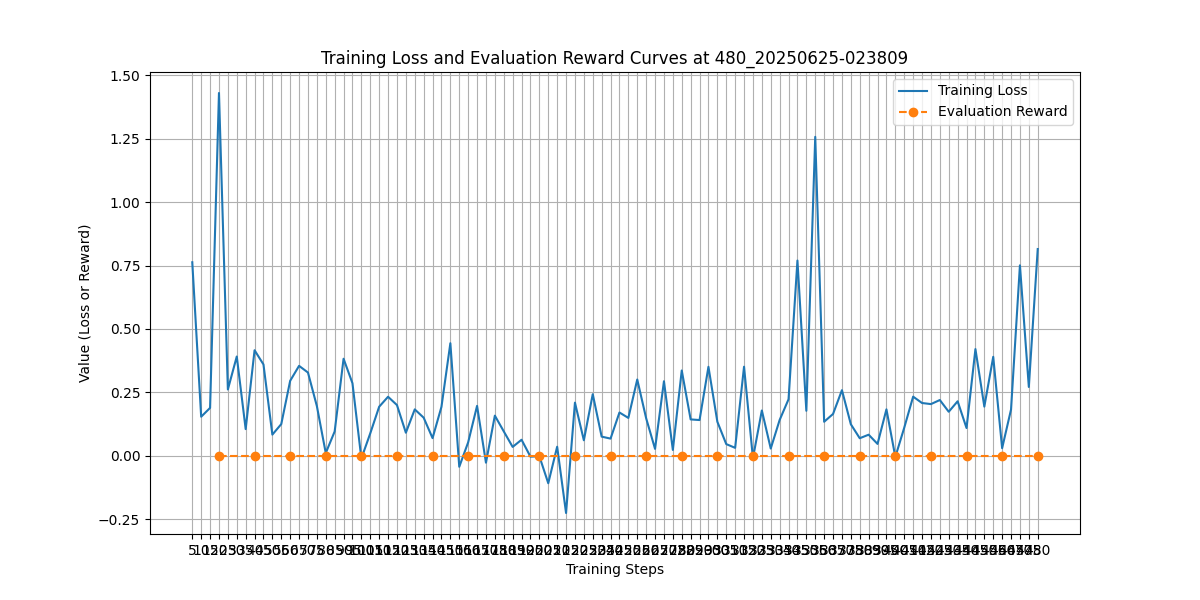

It trained for around 480 steps and then my process got an error so it stopped. I should have done the plotting a bit nice here.


Why did I do that? I wanted to learn RL and implemented things from scratch and see how things behave before following a working receipe

### Do we need RL?
I was looking online if there is a brut force solution to solve wordle without any fintenuning, just with software 1.0 no AI just good old plain algorithm.

I landed on [https://youtu.be/v68zYyaEmEA?si=D2HJCcVa-b6uhD1i](3blue1brow-wordle) video where he walks us through how he used information theory in order to guess the word based on the feedback.

The main idea is which word should the algorith provides in order to maximize the amount of information it will recieve from the feedback.
Please go watch the video if we want to know more details about it. Lets look at this example where the secret word is "STARS":

```
Played 'TARES', got feedback '---x✓'

Possible words remaining: 7 -> ['STARS', 'DRATS', 'BRATS', 'FRATS', 'PRATS', 'ARTIS', 'ROTAS']
Played 'FIORD', got feedback 'xxx✓x'

Possible words remaining: 1 -> ['STARS']

🎉 🎉 🎉 Congratulations! 'STARS' is the correct answer, after 3 plays!
```
The algorithmic version starts with the following assumptions:
 1) we have a finite list of words (words_list)
 2) we have a finite list of allowed guesses where (allowed_guesses <= words_list)

After each guess, we get feedback on the letter positions which allows us to keep only the possible guesses
First, the word 'TARES' provides us with the maximum amount of information ~6.3 bits
from that feedback, there are now 7 possible words remaining.

In order to guess which one of the 7, the idea behind the algorithm, is to propose a word in the allowed guesses that would provides a maximum information gain. This word 'FIORD' since we are left with only one remaining word.

After playing with wordle_no_rl.ipynb you might be wondering like me why do we need RL in the first place if we can solve a problem with information theory.



#### 1. The Heuristic Approach

*   **How it works:**
    1.  Divide all possible words into two simple buckets: "Consistent" (could be the answer) and "Inconsistent" (contradicts the clues).
    2.  The "Consistent" words become the pool for our `positives`. The secret word is the best positive.
    3.  The "Inconsistent" words become the pool for our `negatives`.
    4.  **We then randomly sample** from these buckets to create the ranked lists. We don't try to determine if `REACT` is a "better" guess than `TRACE` among the consistent words.

*   **Pros:**
    *   **Fast and Simple:** This logic is very quick to compute. It only requires a few loops and set operations.
    *   **Teaches the Core Task:** It effectively teaches the model the most important lesson: **don't make illogical guesses.** A model that learns to always pick from the "Consistent" bucket is already 90% of the way to being a good player.
    *   **Good Enough for LoRA:** For parameter-efficient fine-tuning like LoRA, teaching this fundamental heuristic is often sufficient to see a massive improvement in performance.

*   **Cons:**
    *   **Not Truly Optimal:** It doesn't teach the model the subtle art of picking the *best* among all valid words. It treats all "consistent" words as equally good, which isn't true.

#### 2. The Information Theory Approach

*   **How it works:**
    1.  This is the method used by solvers like 3Blue1Brown's. For *every possible guess* (from the entire dictionary of ~13,000 words)...
    2.  ...and for *every remaining possible answer*...
    3.  ...calculate the feedback pattern you would get.
    4.  Group the possible answers by these feedback patterns.
    5.  Calculate the "entropy" or "information gain" for that guess. A guess is good if it splits the remaining possible answers into many small, evenly-sized groups.
    6.  The guess with the highest information gain is the **optimal** next move.

*   **Pros:**
    *   **Mathematically Optimal:** This method is guaranteed to find the guess that, on average, provides the most new information and narrows down the possibilities fastest.
    *   **Creates a "Perfect" Ranking:** You could use this method to create a perfectly ranked list of `positives` for your GRPO dataset, teaching the model not just to be logical, but to be a master strategist.

*   **Cons:**
    *   **Extremely Computationally Expensive:** For a single turn where there are 2,000 possible answers left, this calculation involves `13,000 (guesses) * 2,000 (answers)` operations just to find the single best next word. Doing this to generate thousands of ranked lists for a dataset would take a very, very long time.

---




# Training Steps

| Stage | **SFT-LoRA (Phase 1)** | **GRPO-LoRA (Phase 2)** |
| :--- | :--- | :--- |
| **Purpose** | Teach format & style | Teach preference & strategy |
| **Input Model**| Base LLM (e.g., gemma3) | SFT-LoRA-tuned model |
| **Data Format**| `(prompt, completion)` | `(prompt, positives, negatives)` |
| **Output** | A competent model | An optimized model |



## Without SFT


## With SFT

Running with SFT did help a lot with rewards, since the model now outputs 5 letters and guess tags almost all the time.
at step 34, started seeing better guesses: ❌ Did not guess 'REARM' in 6 trials. guesses: ['TRAYS', 'STARS', 'SERVE', 'SEARS', 'RESVE', 'SRESV']

![SFT Training Loss Curve](./docs/images/lora_sft_loss_curve_20250629-081953.png)

### Data generation

* [sft_wordle_cot_data_generation.py](sft_wordle_cot_data_generation.py)

# Lessons learned

1. Smaller models have hard time following instructions. In the begining I had loss nan and it turned out the model was not even outputing <guess></guess> tags

2. Quantized models seems to have lose quality dramatically. The same model 3b-it-bf16 vs qat-4 have totally different qualtiy

3. How often to update the reference model, since the small models are not very good at following instructions, we want to update the reference model more often to encourage the qualtiy to go higher faster.

4. System prompt matters. Orginally I started with this prompt on the non quantized model but then when I passed to the quantized model, it seems too much for the quantized model to follow it. When I adjusted the prompt, I was able to start the training, it was not outputing guesses before.

5. Rewards should not be all or nothing. For example when I added partial credit rewards function where the model gets rewards for guessing a letter or more in the word the rewards increased and the model training got better in the sense we had less and less no guesses. 

6. How to estimate if a model can run on my machine (see below)

7. Model collapse from Gradient explosion, the model start just generating: `<think><pad><pad>....<pad></think>` this is cause by an jump in loss and then weights updates. here is a trace: 
```
Step 0010 | Train Loss: 0.3947 | Best Guess: 'BRISKS' on 'LOYAL' (R: 1.10)
GRPO Training Steps:   8%|▊         | 15/200 [02:13<26:22,  8.55s/it]
Step 0015 | Train Loss: 1569.6305 | Best Guess: 'BRISKS' on 'BATTY' (R: 4.30)
GRPO Training Steps:   8%|▊         | 15/200 [02:19<26:22,  8.55s/it, skipped=1]
Skipping batch with max reward 0.00 on the following generations:
--  <think><pad><pad>...</think>
--  <think><pad><pad>...</think>
```
In order to prevent this, applied clipping on the advantages and the ratio.
**The Goal:** To prevent a single outlier reward from having a disproportionate impact on the training update.

First, remember what we do to the advantages: we **normalize** them. This means we adjust them so that their batch-wise average is 0 and their standard deviation is 1.

-   **The "Normal" Case:** In a standard normal distribution, almost all values (~99.7%) fall within +/- 3 standard deviations of the mean. So, most of our normalized advantage values will naturally be in a small range like `[-3, 3]`.

-   **The "Outlier" Problem:** What if one of your two generations is "normal" (reward: 4.0) but the other is a bizarre, malformed output that gets a reward of `0.1`? The difference is huge. After normalization, this could create an unusually large advantage value for the "good" generation. If we feed this huge advantage directly into the loss, it will dominate the gradient and tell the model to "do this one thing at all costs," which can destabilize learning.

Increase the number of generations from 2 to 4 should minimize those exploding ones since the advantage would be a bit smoother.

8. Quantization and Dequantization on MLX: save a model that has a mix of layer types (some are QuantizedLinear from the base model, some are newly fused Linear layers). The MLX runtime doesn't know how to handle this inconsistent state.

The solution is to de-quantize the entire model in memory right before you fuse the weights. This way, you get the best of both worlds:

Training: You can continue to train using the memory-efficient gemma-3-1b-it-qat-8bit model, which works perfectly on your 16GB Mac.
Merging: The script will load the quantized model and your adapters, convert the base model to full precision in memory, and then merge the weights. The final saved model will be a consistent, full-precision model, completely avoiding the Metal runtime error.

9. Use LoRA with GRPO and only one base model to calculate the loss. This is done by only passing the trainable parameters (LoRA) since the base model is frozen and each time we calculate the loss based on the current policy compared with the old policy. Without this, my mac was getting out of memory and shutting down at step 1 or 2.


10. Reward functions can have two purposes if we dont have enough data:
   Let's walk through the first turn of a game for the secret word **`AUDIO`**.

We will clearly distinguish between:
*   **Part A: Game State Advancement** (What the player sees, how the game progresses)
*   **Part B: What the Loss Function Sees** (The data collected for training)

### Scenario Setup

*   **Secret Word:** `AUDIO`
*   **Config:** `config.rl.num_generations = 3` (The model will generate 3 guesses per turn)

---

### **Turn 1: The Starting Guess**

#### Part A: Game State Advancement

1.  **Create Prompt:** It's the first turn, so `past_feedback` is empty.
    *   The `format_prompt_for_model` function creates the initial prompt: `"This is the first turn. Please provide your best starting word."`

2.  **Generate Guesses (Explore Actions):** The model receives this prompt and, because `num_generations=3`, it generates three different potential starting words. Let's imagine these are its outputs:

    *   **Generation 1:** `ARISE`
    *   **Generation 2:** `ADIEU`
    *   **Generation 3:** `ROATE`

3.  **Evaluate and Score Guesses:** The `play_wordle_game` loop now calculates the reward for each of these three guesses against the secret word `AUDIO`.

    *   **Guess 1 (`ARISE`):** Finds the `A` and `I`. Let's say `calculate_total_reward` gives it a **Reward of 2.5**.
    *   **Guess 2 (`ADIEU`):** Finds `A`, `D`, `I`, `U`. This is a fantastic starting guess for `AUDIO`. It will get a much higher reward. Let's say **Reward of 7.0**.
    *   **Guess 3 (`ROATE`):** Finds `A` and `O`. Let's say **Reward of 3.0**.

4.  **Select the Best Guess (Commit to a Path):** The system sees that `ADIEU` has the highest reward (7.0). It selects this as the "official" move for Turn 1.

5.  **Advance the Game State:**
    *   The `best_guess` is now `ADIEU`.
    *   The system calculates the official Wordle feedback for this single best guess: `get_feedback("ADIEU", "AUDIO")` returns `✓ - ✓ - ✓ x`. (A-correct, D-wrong pos, I-correct, E-not in word, U-correct)
    *   This feedback `✓ - ✓ - ✓ x` is now stored in the `past_feedback` list.
    *   The game checks if `ADIEU == AUDIO`. It's false, so the game continues to Turn 2.

**End of Turn 1 - Game State Summary:** The game has officially played `ADIEU` and is ready to use the feedback `✓ - ✓ - ✓ x` to build the prompt for the next turn.

---

#### Part B: What the Loss Function Sees from Turn 1

At the end of the game, the `GameRollout` object is passed to the loss function. For now, it contains the three `GenerationAttempt` objects created in Turn 1.

1.  **Input Data:** The loss function receives the list of attempts.

2.  **Grouping:** It groups the attempts by their `prompt_string`. Since all three attempts came from the same initial prompt, they all go into a single group.

3.  **The Data Inside the Group:** This is the crucial "contrastive" data the loss function will use to learn. It looks like this:

| `prompt_string` | `full_response` | `reward` | `log_probs` |
| :--- | :--- | :--- | :--- |
| "This is the first turn..." | `<think>...</think><guess>ARISE</guess>` | `2.5` | `[...]` |
| "This is the first turn..." | `<think>...</think><guess>ADIEU</guess>` | `7.0` | `[...]` |
| "This is the first turn..." | `<think>...</think><guess>ROATE</guess>` | `3.0` | `[...]` |

4.  **Loss Calculation:** The `grpo_loss_fn` performs its calculations on this group:
    *   **Calculates Mean Reward:** `mean(2.5, 7.0, 3.0) ≈ 4.17`
    *   **Calculates Advantages:**
        *   `ARISE`: `2.5 - 4.17 = -1.67` (discourage)
        *   `ADIEU`: `7.0 - 4.17 = +2.83` (encourage)
        *   `ROATE`: `3.0 - 4.17 = -1.17` (discourage)
    *   **Calculates Policy Ratios:** It uses the `log_probs` to get the ratio of how likely the *current* model is to say each word vs. the *reference* model.
    *   **Objective:** The final PPO objective will push the model's weights to **increase the probability of generating `ADIEU`** and **decrease the probability of generating `ARISE` and `ROATE`** when given the initial prompt.

This process will repeat for Turn 2, but now with a completely different prompt and a new set of generated guesses. For example, the prompt for Turn 2 would be something like:
`"**Clues so far:**\n* Guess 1: ADIEU → A(✓) D(-) I(✓) E(x) U(✓)"`

The model would then generate three new guesses, a new "best" guess would be chosen (e.g. `AUDIO`), and a new group of three attempts would be added to the `GameRollout` for the loss function to process.

### Exploration vs Exploitation


Let's break down exactly how it maps to our Wordle bot's strategy.

### Defining the Terms in Our Context

*   **Exploration:** Trying out several different guesses (actions) to discover which ones give the most information and lead to the highest reward. You are "exploring" the space of possibilities, even if some seem less likely to be correct, because they might reveal valuable clues.
*   **Exploitation:** Using the knowledge you already have to choose the single best guess (action) that you believe will maximize your immediate reward and chance of winning. You are "exploiting" your current best strategy.

### How Our `play_wordle_game` Balances the Two

The genius of this GRPO-style approach is that it does **both exploration and exploitation within every single turn**.

#### The Exploration Step (Generating Variety)

This is the `for i in range(num_generations):` loop.

```python
for i in range(num_generations):
    text, tokens, logits = generate_with_log_probs(...)
```

When the model generates `ARISE`, `ADIEU`, and `ROATE` for the same prompt, it is **exploring**. Instead of just outputting the single word it thinks is most probable, the `sampler` (with a temperature > 0) encourages it to generate a diverse set of candidates. It's asking "what if" questions:
*   "What if I try a word with common consonants like `ARISE`?"
*   "What if I try to knock out as many vowels as possible with `ADIEU`?"
*   "What if I try this other common starter, `ROATE`?"

This step is all about **gathering information**.

#### The Exploitation Step (Committing to the Best)

This happens immediately after the exploration loop, when the code finds the guess with the highest reward.

```python
# Finds the index of the guess with the maximum reward
best_generation_idx = ... 
# Selects that single best guess to be the "official" move
best_attempt = current_turn_attempts[best_generation_idx]
```
ß
This is the **exploitation** step. After exploring three options, the agent uses the information it just gathered (the calculated rewards) to exploit the best available action. It concluded that `ADIEU` was the most promising path and committed to it to advance the game.

### The Overall Strategy

So, the agent's strategy on each turn is:

1.  **Explore:** Generate a diverse set of `N` possible guesses.
2.  **Evaluate:** Quickly score all `N` exploratory guesses.
3.  **Exploit:** Commit to the single guess that received the best score to make your official move.
4.  **Learn from Everything:** Crucially, the data from *all* `N` guesses (the good, the bad, and the ugly) is sent to the loss function. This teaches the model to make its future *explorations* more intelligent. It learns to explore better options over time.

This is a very powerful and effective way to handle the trade-off. Instead of randomly choosing to explore or exploit for an entire turn, it does a small, controlled burst of exploration and then immediately exploits the results of that exploration.


## Additional details on system estimates for training

The key on an M1 Mac is the **Unified Memory**. Both the CPU and GPU (MPS) use the same 16GB of RAM, so we need to account for everything that will be loaded into it.

Here are the main components that consume memory:

1.  **Model Weights (The Base Cost)**
2.  **KV Cache (The Generation Cost)**
3.  **Training Overhead (Gradients, Optimizer States, Activations)**
4.  **System/App Memory (The Buffer)**
---

### Step 1: Calculate Model Weight Memory

This is the easiest part. The formula is:
`Memory = (Number of Parameters) * (Bytes per Parameter)`

First, the bytes per parameter for different quantization levels:
*   **bf16 / float16:** 2 bytes
*   **8-bit:** 1 byte
*   **4-bit:** 0.5 bytes (on average)
*   **3-bit:** ~0.375 bytes

In our script, we load **two** models: the main `model` and the `ref_model`. So we must double this cost.

**Example Calculation (for the risky `gemma-3-4b-it-qat-4bit`):**
*   Parameters: 4 billion (4e9)
*   Bytes per parameter: 0.5 (for 4-bit)
*   Memory per model: `4e9 * 0.5 = 2e9 bytes = 2 GB`
*   **Total for both models:** `2 GB * 2 =` **4 GB**

### Step 2: Estimate KV Cache Memory

This is the hidden memory hog during text generation. Its size depends on the sequence length, the number of parallel generations, and the model's architecture.

A simple rule of thumb is that the KV Cache size grows **linearly with sequence length and the number of generations**.

Let's estimate it for our settings (`MAX_COMPLETION_LENGTH = 128`, `NUM_GENERATIONS = 2`):
*   **Sequence Length:** The prompt length + 128. Let's say ~300 tokens total.
*   **Generations:** 2 are running in parallel.
*   For a 1B model, this is very manageable, likely under **1 GB**.
*   For a 4B model, it would be larger, maybe **1-2 GB**.

This is why changing `MAX_COMPLETION_LENGTH` from 128 to 512 (a 4x increase) had such a dramatic impact on memory.

### Step 3: Estimate Training Overhead

This includes the memory for gradients, optimizer states (AdamW is heavy), and layer activations during the forward/backward pass.

*   **Gradients & Optimizer:** For LoRA, this is very small because we are only training a tiny fraction of the weights. For our `0.459M` trainable parameters, this is only a few megabytes, so it's negligible.
*   **Activations:** This is the main cost here. It scales with `sequence_length * batch_size` (where batch size is `NUM_GENERATIONS`). With our low settings (`128` length, `2` generations), this is manageable. Let's budget **1-2 GB** for this, to be safe.

### Step 4: The Final Budget (Putting It All Together)

Let's create a budget for running the **risky `gemma-3-4b-it-qat-4bit` model** on your 16GB M1:

| Component | Estimated Memory | Notes |
| :--- | :--- | :--- |
| Model Weights (`model` + `ref_model`) | ~4.0 GB | The base cost of loading two 4B 4-bit models. |
| KV Cache (Peak during generation) | ~2.0 GB | With `MAX_COMPLETION_LENGTH=128`, `NUM_GENERATIONS=2`. |
| Training Overhead (Activations) | ~2.0 GB | A safe estimate for our batch size and length. |
| **Subtotal (Script Usage)** | **~8.0 GB** | |
| OS & Other Apps | ~4.0 GB | A realistic buffer for macOS and other background tasks. |
| **Safety Buffer** | ~2.0 GB | It's crucial not to use 100% of RAM. |
| **ESTIMATED TOTAL PEAK USAGE**| **~14.0 GB**| |

**The Verdict:** The total estimate of **14.0 GB** is very close to your 16 GB limit. This is why I called it "risky." It would probably work, but if you had a few Chrome tabs open or the sequence length was slightly longer, it could easily start swapping to the SSD, causing a massive slowdown.

By contrast, the **`gemma-3-1b-it-qat-4bit`** model we are using now has a base cost of just `2 * (1e9 * 0.5) = 1 GB`, making the total peak usage much lower and safer.

### The KV Cache Formula

The size of the Key-Value cache can be calculated with the following formula:

`Cache Size = 2 * num_layers * sequence_length * hidden_dim * NUM_GENERATIONS * bytes_per_element`

Let's break down each term and plug in the numbers for our specific case.

---

### 1. Finding the Model's Architectural Details

We need `num_layers` and `hidden_dim` for the `gemma-3-1b` model. Since that specific model isn't released yet, we'll use the numbers from a very similar public model, **Gemma 2B**, as a close proxy. (The actual Gemma 1B would be even smaller).

*   `num_layers`: **18**
*   `hidden_dim` (hidden dimension size): **2048**

### 2. Getting Parameters from Our Script

*   `sequence_length`: This is the length of the prompt plus the max completion length. Let's assume a generous average prompt length of ~170 tokens.
    `170 (prompt) + 128 (completion) ≈` **300 tokens**
*   `NUM_GENERATIONS`: We set this to **2** to save memory.
*   `bytes_per_element`: The KV cache is typically stored in `float16` or `bfloat16` for performance, even when using a quantized model. So, we use **2 bytes**.
*   The `2` at the start of the formula is because for each item, we store both a **K**ey and a **V**alue.

### 3. The Calculation

Now, let's plug everything into the formula:

`Cache Size = 2 (K/V) * 18 (layers) * 300 (tokens) * 2048 (hidden_dim) * 2 (generations) * 2 (bytes)`

Let's do the math:

1.  `2 * 18 * 300 * 2048 * 2 * 2`
2.  `= 36 * 300 * 2048 * 4`
3.  `= 10,800 * 2048 * 4`
4.  `= 22,118,400 * 4`
5.  `=` **88,473,600 bytes**

### 4. The Result

To make that number easier to understand, let's convert it to megabytes:

`88,473,600 bytes / (1024 * 1024) ≈` **84.4 MB**

So, the precise estimate for the peak KV Cache size with our current settings is only about **84 MB**.

My initial heuristic of "under 1 GB" was extremely safe. This calculation proves that with our optimized settings (`NUM_GENERATIONS=2`, `MAX_COMPLETION_LENGTH=128`), the memory impact of the KV cache is very small and easily manageable for your system.

In [ ]:
import mlx.core as mx
import mlx.nn as nn
from mlx.utils import tree_flatten
from mlx_lm import load

import mlx.core as mx
import mlx.nn as nn
from mlx.utils import tree_flatten
from mlx_lm import load

def calculate_mlx_memory_usage(
    model: nn.Module,
    model_name: str = None,
    dtype: mx.Dtype = mx.float32,
    pretty_print: bool = True
):
    """
    Calculates and optionally prints the estimated memory usage of an MLX model.

    This function estimates the total memory required to store the model's
    parameters and their gradients, providing a formatted printout.

    Args:
        model (nn.Module): The MLX model.
        model_name (str, optional): The name of the model for display purposes.
        dtype (mx.Dtype, optional): The data type to assume for parameters
            and gradients. Defaults to mx.float32.
        pretty_print (bool, optional): If True, prints a formatted summary
            of the memory usage. Defaults to True.

    Returns:
        dict: A dictionary containing the memory usage in gigabytes (GB) and
              element counts for parameters, gradients, and the total.
    """
    # Get the size in bytes of a single element of the given data type
    element_size = mx.array(0, dtype=dtype).itemsize

    # Calculate memory for all model parameters (the model's state)
    total_params_elements = sum(p.size for _, p in tree_flatten(model.parameters()))
    params_bytes = total_params_elements * element_size
    params_gb = params_bytes / (1024**3)

    # Calculate memory for gradients (only for trainable parameters)
    grad_params_elements = sum(p.size for _, p in tree_flatten(model.trainable_parameters()))
    grads_bytes = grad_params_elements * element_size
    grads_gb = grads_bytes / (1024**3)

    # Calculate total memory
    total_memory_bytes = params_bytes + grads_bytes
    total_gb = total_memory_bytes / (1024**3)

    if pretty_print:
        params_m = total_params_elements / 1e6
        grads_m = grad_params_elements / 1e6

        # [THE CHANGE] Create a dynamic header
        header = "--- MLX Model Memory Details"
        if model_name:
            header += f" for '{model_name}'"
        header += " ---"
        
        print(f"\n{header}")
        print(f"[*] Target Data Type: {str(dtype).split('.')[-1]}")
        print("-" * (len(header) - 1)) # Match the header length
        print("[Model State (All Parameters)]")
        print(f"  - Count:      {params_m:,.2f} M")
        print(f"  - Memory (GB): {params_gb:.3f} GB")
        print("\n[Gradients (Trainable Only)]")
        print(f"  - Count:      {grads_m:,.3f} M")
        print(f"  - Memory (GB): {grads_gb:.3f} GB")
        print("\n[Total Estimated Usage]")
        print(f"  - Memory (GB): {total_gb:.3f} GB")
        print("-" * (len(header) - 1))

    return {
        "params_gb": params_gb,
        "grads_gb": grads_gb,
        "total_gb": total_gb,
        "total_params_elements": total_params_elements,
        "grad_params_elements": grad_params_elements,
    }



# --- Example Usage ---
model_id = "mlx-community/gemma-3-1b-it-qat-8bit"
# 1. Load a model (e.g., the one from your training script)
#    Using a small model for a quick example.
print("Loading model: ", model_id)
model, tokenizer = load(model_id)

mem_f32 = calculate_mlx_memory_usage(model, model_id, dtype=mx.int8)

/Users/charbelk/dev/wordle/wordle-rl/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading model:  mlx-community/gemma-3-1b-it-qat-8bit


Fetching 8 files: 100%|██████████| 8/8 [00:00<00:00, 138084.08it/s]



--- MLX Model Memory Details for 'mlx-community/gemma-3-1b-it-qat-8bit' ---
[*] Target Data Type: int8
--------------------------------------------------------------------------
[Model State (All Parameters)]
  - Count:      366.25 M
  - Memory (GB): 0.341 GB

[Gradients (Trainable Only)]
  - Count:      0.134 M
  - Memory (GB): 0.000 GB

[Total Estimated Usage]
  - Memory (GB): 0.341 GB
--------------------------------------------------------------------------



## Additional details on system prompt
** Prompt used with non quantized model **
```
SYSTEM_PROMPT = """
You are an expert Wordle solver. Your task is to deduce a secret 5-letter word in 6 tries or less by making intelligent guesses and logically analyzing the feedback you receive.

### GAME RULES
1.  **Objective:** Guess a secret 5-letter English word.
2.  **Guesses:** You have a maximum of 6 tries. Each guess must be a valid 5-letter word.
3.  **Feedback:** After each guess, every letter receives feedback:
    *   **✓ (Correct):** The letter is in the word and in the correct position.
    *   **- (Misplaced):** The letter is in the word but in the wrong position.
    *   **x (Incorrect):** The letter is not in the word at all.

### YOUR TASK
For each turn, you must respond in two parts: a thought process and a guess.

1.  **Think (`<think>`):** First, carefully analyze all the feedback from previous guesses. Reason step-by-step to determine your next best guess. Your reasoning must include:
    *   **Constraint Analysis:** Summarize what you know.
        *   Correctly placed letters (`✓`).
        *   Misplaced letters (`-`) and the positions they are known *not* to be in.
        *   Incorrect letters (`x`) that must be excluded.
    *   **Strategy Synthesis:** Combine all constraints to narrow down the possibilities. State your strategy for the next guess (e.g., testing a common letter, eliminating possibilities, or attempting a direct solution).
    *   **Candidate Selection:** Propose a word that fits all the constraints and explain why it's a strong choice.

2.  **Guess (`<guess>`):** After your reasoning, provide your chosen 5-letter word inside `<guess>` tags.

---
### EXAMPLES

**Example 1: First Guess (No prior feedback)**

<think>
This is the first guess, so there is no feedback to analyze. A good starting word should use common, distinct letters to maximize the information gained. 'RAISE' is an excellent choice because it tests three common vowels (A, I, E) and two common consonants (R, S). This will help narrow down the possibilities significantly.
</think>
<guess>RAISE</guess>

**Example 2: Guess with Prior Feedback**

**Context:**
*   **Guess 1:** STORM → Feedback: S(-) T(x) O(x) R(-) M(x)
*   **Guess 2:** BRAVE → Feedback: B(✓) R(✓) A(x) V(x) E(x)

<think>
**1. Constraint Analysis:**
*   **Correct (✓):** `B` is in position 1. `R` is in position 2. The word starts with `BR___`.
*   **Misplaced (-):** `S` is in the word, but not in position 1 (from STORM).
*   **Incorrect (x):** `T, O, M, A, V, E` are not in the word.

**2. Strategy Synthesis:**
*   The word has the structure `BR_ _ _`.
*   It must contain an `S` somewhere in the last three positions.
*   It must not contain any of the incorrect letters.

**3. Candidate Selection:**
I need to find a word that fits the pattern `BR_S_` or `BR__S`. Let's try to fill the blanks with the remaining available letters. A common word that fits this pattern is `BRISK`.
*   `B` is in position 1. (✓)
*   `R` is in position 2. (✓)
*   It contains an `S`. (✓)
*   It does not use any eliminated letters (`T, O, M, A, V, E`). (✓)
*   `BRISK` is a valid 5-letter word. This is a very strong candidate.
</think>
<guess>BRISK</guess>
"""
```

# Appendix

## Pytorch helpers

Some pytorch helper utils to allow us better understanding the next steps:

* [gather](https://docs.pytorch.org/docs/stable/generated/torch.gather.html#torch-gather): Gathers values along an axis specified by dim and the index (which indicates the indices of elements to gather).
* [unsqueeze](https://docs.pytorch.org/docs/stable/generated/torch.unsqueeze.html): Returns a new tensor with a dimension of size one inserted at the specified position.
* [squeeze](https://docs.pytorch.org/docs/stable/generated/torch.squeeze.html#torch-squeeze): Returns a tensor with all specified dimensions of input of size 1 removed.

* Unsqeeze: allows us to go from inputs_id with shape (batch_size, sequence_length) to (batch_size, sequence_length, 1). This is done to make the shape compatible with the matrices we have already in the transformer (batch_size, sequence_length, vocab_size).

* Squeeze: allows us to go back from an unsqueeze.

In [ ]:
x = torch.tensor([1, 2, 3])
print(f"Original tensor x:\n{x}")
print(f"Original shape: {x.shape}")

x_unsqueezed_0 = x.unsqueeze(dim=0) # Add dimension at position 0
print(f"\nAfter x.unsqueeze(dim=0):\n{x_unsqueezed_0}")
print(f"New shape: {x_unsqueezed_0.shape}") # Shape: [1, 3]

# Example 1.2: Adding a dimension at the end
x_unsqueezed_neg1 = x.unsqueeze(dim=-1) # Add dimension at position -1 (last)
# Equivalent to x.unsqueeze(dim=1) for a 1D tensor
print(f"\nAfter x.unsqueeze(dim=-1):\n{x_unsqueezed_neg1}")
print(f"New shape: {x_unsqueezed_neg1.shape}") # Shape: [3, 1]

In [ ]:
y = torch.tensor([[1, 2], [3, 4]])
print(f"\nOriginal tensor y:\n{y}")
print(f"Original shape: {y.shape}") # Shape: [2, 2]

y_unsqueezed_1 = y.unsqueeze(dim=1) # Add dimension at position 1
print(f"\nAfter y.unsqueeze(dim=1):\n{y_unsqueezed_1}")
print(f"New shape: {y_unsqueezed_1.shape}") # Shape: [2, 1, 2]

In [ ]:
input_ids, _, _ = prepare_inputs(prompt, "fence and")
print('inputs_ids', input_ids)
print('inputs_ids.shape', input_ids.shape)
print('inputs_ids_unsqueeze(-1)', input_ids.unsqueeze(-1))

Squeeze it back

In [ ]:
print('inputs_ids_squeeze(-1)', input_ids.unsqueeze(dim=-1).squeeze(dim=-1))

In [ ]:
# Example 2.1: Using the output from unsqueeze
z = torch.tensor([[[1, 2, 3]]]) # Shape: [1, 1, 3]
print(f"Original tensor z:\n{z}")
print(f"Original shape: {z.shape}")

z_squeezed_all = z.squeeze() # Remove all dimensions of size 1
print(f"\nAfter z.squeeze():\n{z_squeezed_all}")
print(f"New shape: {z_squeezed_all.shape}") # Shape: [3]

# Example 2.2: Squeezing a specific dimension
z_squeezed_dim0 = z.squeeze(dim=0) # Remove dimension 0 (if size 1)
print(f"\nAfter z.squeeze(dim=0):\n{z_squeezed_dim0}")
print(f"New shape: {z_squeezed_dim0.shape}") # Shape: [1, 3]

# Example 2.3: Trying to squeeze a dimension not of size 1
w = torch.tensor([[1, 2, 3], [4, 5, 6]]) # Shape: [2, 3]
print(f"\nOriginal tensor w:\n{w}")
print(f"Original shape: {w.shape}")

w_squeezed_dim0 = w.squeeze(dim=0) # Dim 0 has size 2, so no change
print(f"\nAfter w.squeeze(dim=0):\n{w_squeezed_dim0}")
print(f"New shape: {w_squeezed_dim0.shape}") # Shape: [2, 3]

In [ ]:
source_tensor = torch.tensor([10, 20, 30, 40, 50])
indices = torch.tensor([0, 2, 4, 1]) # Indices to pick from source_tensor
print(f"Source tensor:\n{source_tensor}")
print(f"Indices:\n{indices}")

gathered_values_1d = torch.gather(source_tensor, dim=0, index=indices)
print(f"\nGathered values (dim=0):\n{gathered_values_1d}") # Output: [10, 30, 50, 20]

## Cross Entropy vs Manual Loss

In [ ]:
import torch
import torch.nn.functional as F

# Sample data
logits = torch.tensor(
    [[2.0, 1.0, 0.1],
     [0.5, 2.5, 0.3]])  # Shape: (2, 3)
targets = torch.tensor([0, 2])  # Shape: (2,)


# Manual loss using torch.gather
log_softmax_logits = F.log_softmax(logits, dim=1)  # Shape: (2, 3)
selected_log_probs = torch.gather(
    input=log_softmax_logits,
    dim=1,
    index=targets.unsqueeze(1), # Shape 2, 1
).squeeze(1)  # Shape: (2,)
manual_loss = -selected_log_probs.mean()  # Averaging over the batch


# PyTorch loss
cross_entropy_loss = F.cross_entropy(logits, targets)

print(manual_loss, cross_entropy_loss)

So, above, we can see that the two implementations are equivalent, but let's narrow down a bit further to the torch.gather mechanics
Consider the following two tensors:

In [ ]:
t = torch.tensor(
  [[1., 2.,],
   [3., 4.]]
)

m = torch.tensor(
  [[1, 1],
   [0, 1]]
)

- Above, `t` is a tensor we want to select from, and `m` is a mask to specify how we want to select
 - For instance, since `m` contains `[1, 1]` n the first row, it will select two times the value of `t` in index position `1`, which is the value 2.
 - The second row of `m`, `[0, 1]`, selects index positions 0 and 1 in the second row or `t`, which are `3.` and `4.`

In [ ]:
torch.gather(input=t, dim=-1, index=m)

- In other words, `torch.gather` is a selection function
- When we computed the loss earlier, we used it to retrieve the log probabilities corresponding to the correct token in the 50,257-token vocabulary
- The "correct" tokens are the tokens given in the response entry.

- We use `torch.gather` because it gives us a bit more control than `cross_entropy`, but is, in essence, a similar idea
- The `selection_mask` we use there is to optionally ignore prompt and padding tokens